In [1]:
import os 
import pandas as pd
import numpy as np

In [2]:
os.listdir('.')

['indian_forest_cover.csv',
 '.DS_Store',
 'us_states_geo.json',
 'indian_forest_cover_v1.ipynb',
 'images',
 'Untitled.ipynb',
 'India Shape',
 'forest_cover_1987_2021.csv',
 'forest_cover_data.csv',
 'indian_forest_cover.xlsx',
 'india_st.shp',
 '.ipynb_checkpoints',
 'table_head.csv']

In [7]:
df_ = pd.read_csv('forest_cover_data.csv')
df_ = df_[['STATE','year','Area']]

In [4]:
## how would I solve this problem 

## visualise it so that I see groups ??

## creating features ?
    # get % increase in the fc yoy 
    
## directly I consider the time points as features 

    # k means & other methods 
    
## similarity metrics 
    # jitne bhi pata hai utne 
    
## similarity 
    # many clustering methods 

In [12]:
df_fc_cleaned = df_.pivot(index='year',columns='STATE',values='Area')

In [16]:
df_pct_yoy_del = df_fc_cleaned.diff(1)*100/df_fc_cleaned

<Axes: xlabel='year'>

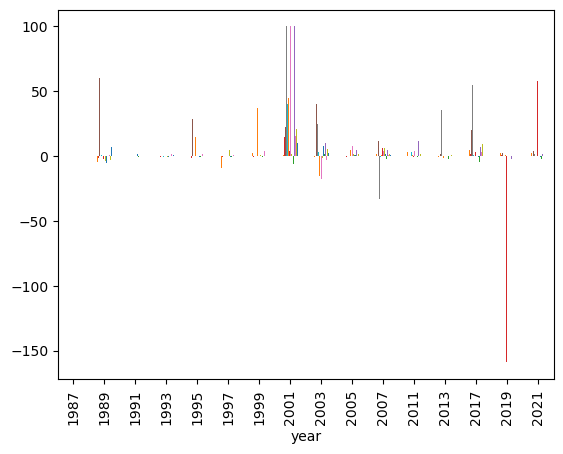

In [21]:
df_pct_yoy_del.plot(kind='bar',legend = False)

In [37]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

In [30]:
df_euc_dist = pd.DataFrame(euclidean_distances(df_pct_yoy_del.dropna().fillna(0).transpose()),
             index = df_pct_yoy_del.columns, 
             columns= df_pct_yoy_del.columns)

In [36]:
import plotly.express as px

fig = px.imshow(df_euc_dist)

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    showlegend = False,
    width = 1000, height = 1000,
    autosize = False )

fig.show()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
df_euc_dist = pd.DataFrame(euclidean_distances(df_pct_yoy_del.dropna().fillna(0).transpose()),
             index = df_pct_yoy_del.columns, 
             columns= df_pct_yoy_del.columns)

In [35]:
import plotly.express as px

fig = px.imshow(df_pct_yoy_del.corr())

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    showlegend = False,
    width = 1000, height = 1000,
    autosize = False )

fig.show()

In [38]:
df_man_dist = pd.DataFrame(manhattan_distances(df_pct_yoy_del.dropna().fillna(0).transpose()),
             index = df_pct_yoy_del.columns, 
             columns= df_pct_yoy_del.columns)

In [39]:
import plotly.express as px

fig = px.imshow(df_man_dist)

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    showlegend = False,
    width = 1000, height = 1000,
    autosize = False )

fig.show()

<Axes: xlabel='year'>

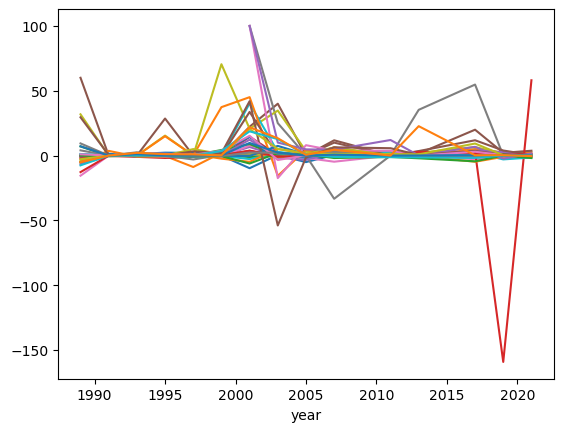

In [40]:
df_pct_yoy_del.plot(kind='line',legend = False)

In [66]:
import plotly.express as px

fig = px.line(df_pct_yoy_del,line_shape='spline')
fig.show()

In [64]:
df_pct_yoy_del.columns

Index(['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
       'ASSAM', 'BIHAR', 'CHANDIGARH', 'DADRA AND NAGAR HAVELI',
       'DAMAN AND DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'KARNATAKA', 'KERALA',
       'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA',
       'MIZORAM', 'NAGALAND', 'ORISSA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN',
       'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL'],
      dtype='object', name='STATE')

In [59]:
from sklearn.cluster import KMeans

In [70]:
df_pct_yoy_del_cleaned = df_pct_yoy_del.dropna().fillna(0).transpose()

In [60]:
X = df_pct_yoy_del.dropna().fillna(0).transpose()
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)

In [61]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [62]:
kmeans.cluster_centers_

array([[ 1.21244807e+01,  1.89472151e+00,  3.81963157e-04,
         2.01825852e+00,  3.68587672e-01,  1.11601564e+00,
         2.07119140e+00,  5.64819714e-01,  1.43916684e-01],
       [ 3.74817535e+00,  1.41063620e-01,  2.82047666e-02,
         6.22851098e+00, -6.52202848e-01, -4.43695093e-03,
         3.02482681e+00, -1.59183673e+02,  5.80726610e+01],
       [ 1.00000000e+02, -3.69565217e+00,  6.38095238e+00,
         4.19580420e+00,  7.85185185e+00,  1.70792831e-01,
         3.43694588e+00, -1.20206068e+00,  8.34896811e-01],
       [ 1.00000000e+02,  2.50000000e+01,  0.00000000e+00,
        -3.33333333e+01,  0.00000000e+00,  3.52750809e+01,
         5.47584187e+01,  0.00000000e+00,  1.25301205e+00]])

In [76]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [80]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

For n_clusters = 2 The average silhouette_score is : 0.7509763577121713
For n_clusters = 3 The average silhouette_score is : 0.6092076897152874
For n_clusters = 4 The average silhouette_score is : 0.43617452540246193
For n_clusters = 5 The average silhouette_score is : 0.5084075475334616
For n_clusters = 6 The average silhouette_score is : 0.5245844948891561
For n_clusters = 7 The average silhouette_score is : 0.4739507987243684
For n_clusters = 8 The average silhouette_score is : 0.34528962315544326
For n_clusters = 9 The average silhouette_score is : 0.2209753894197229


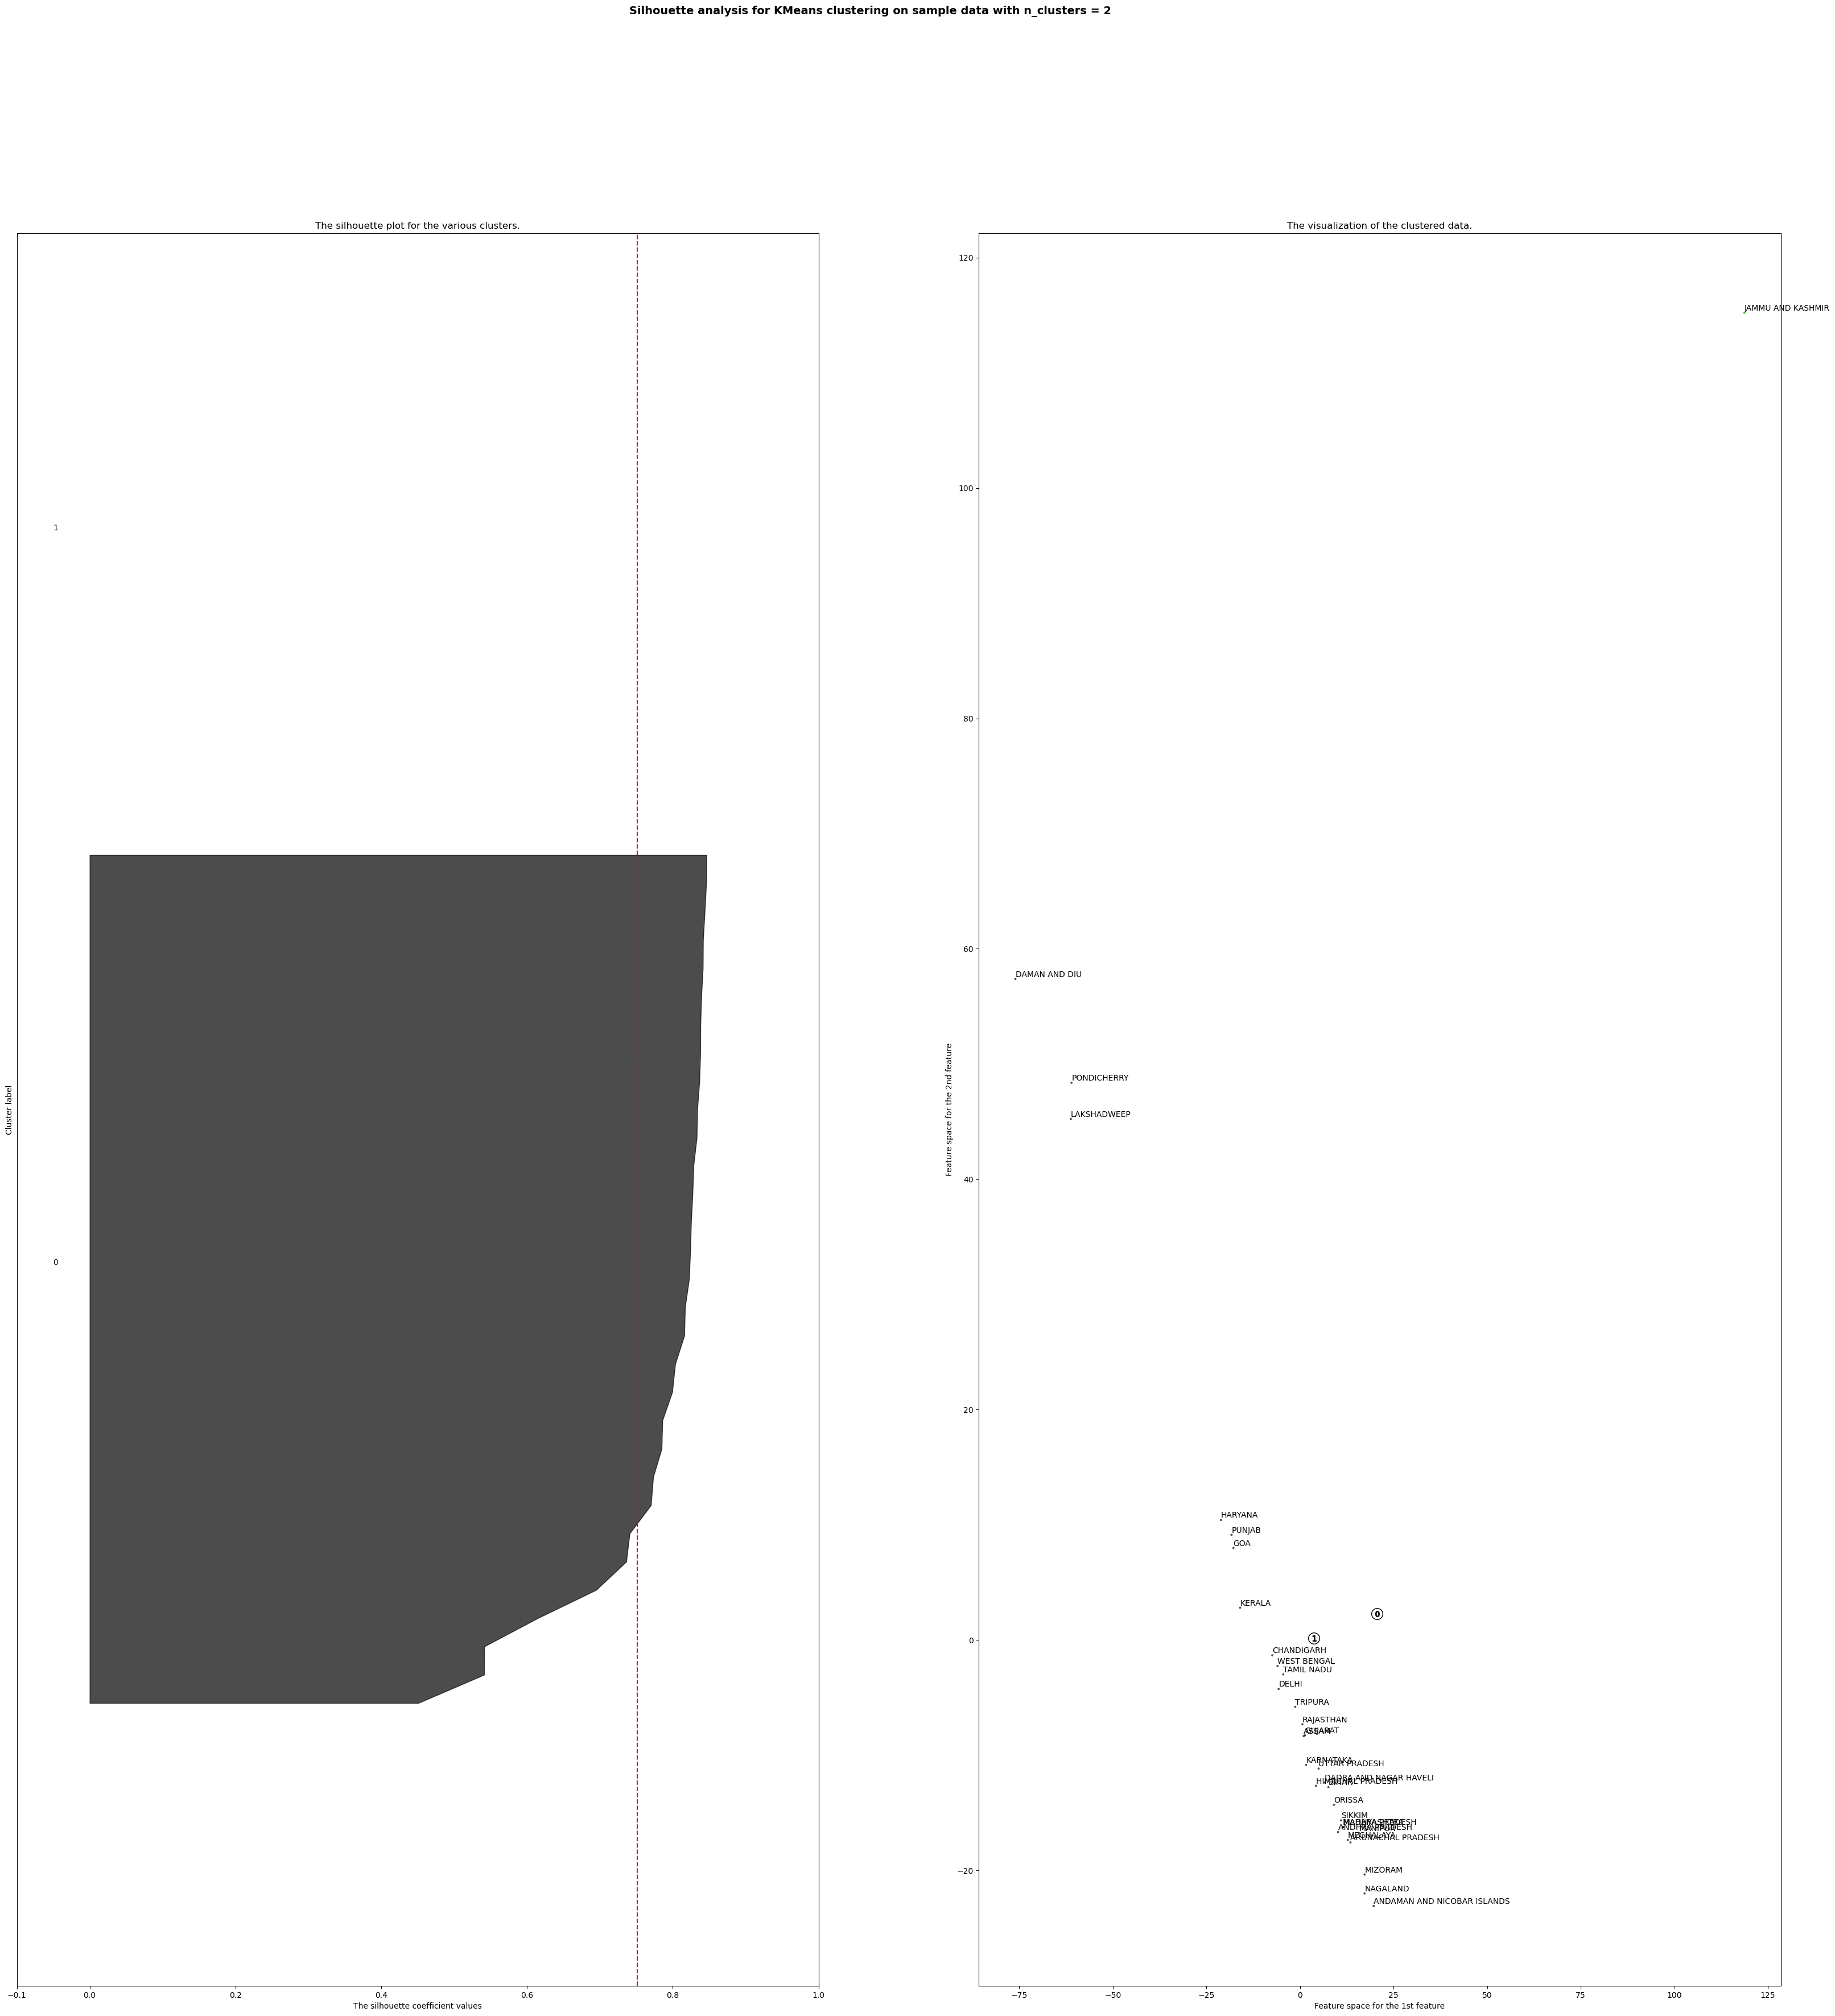

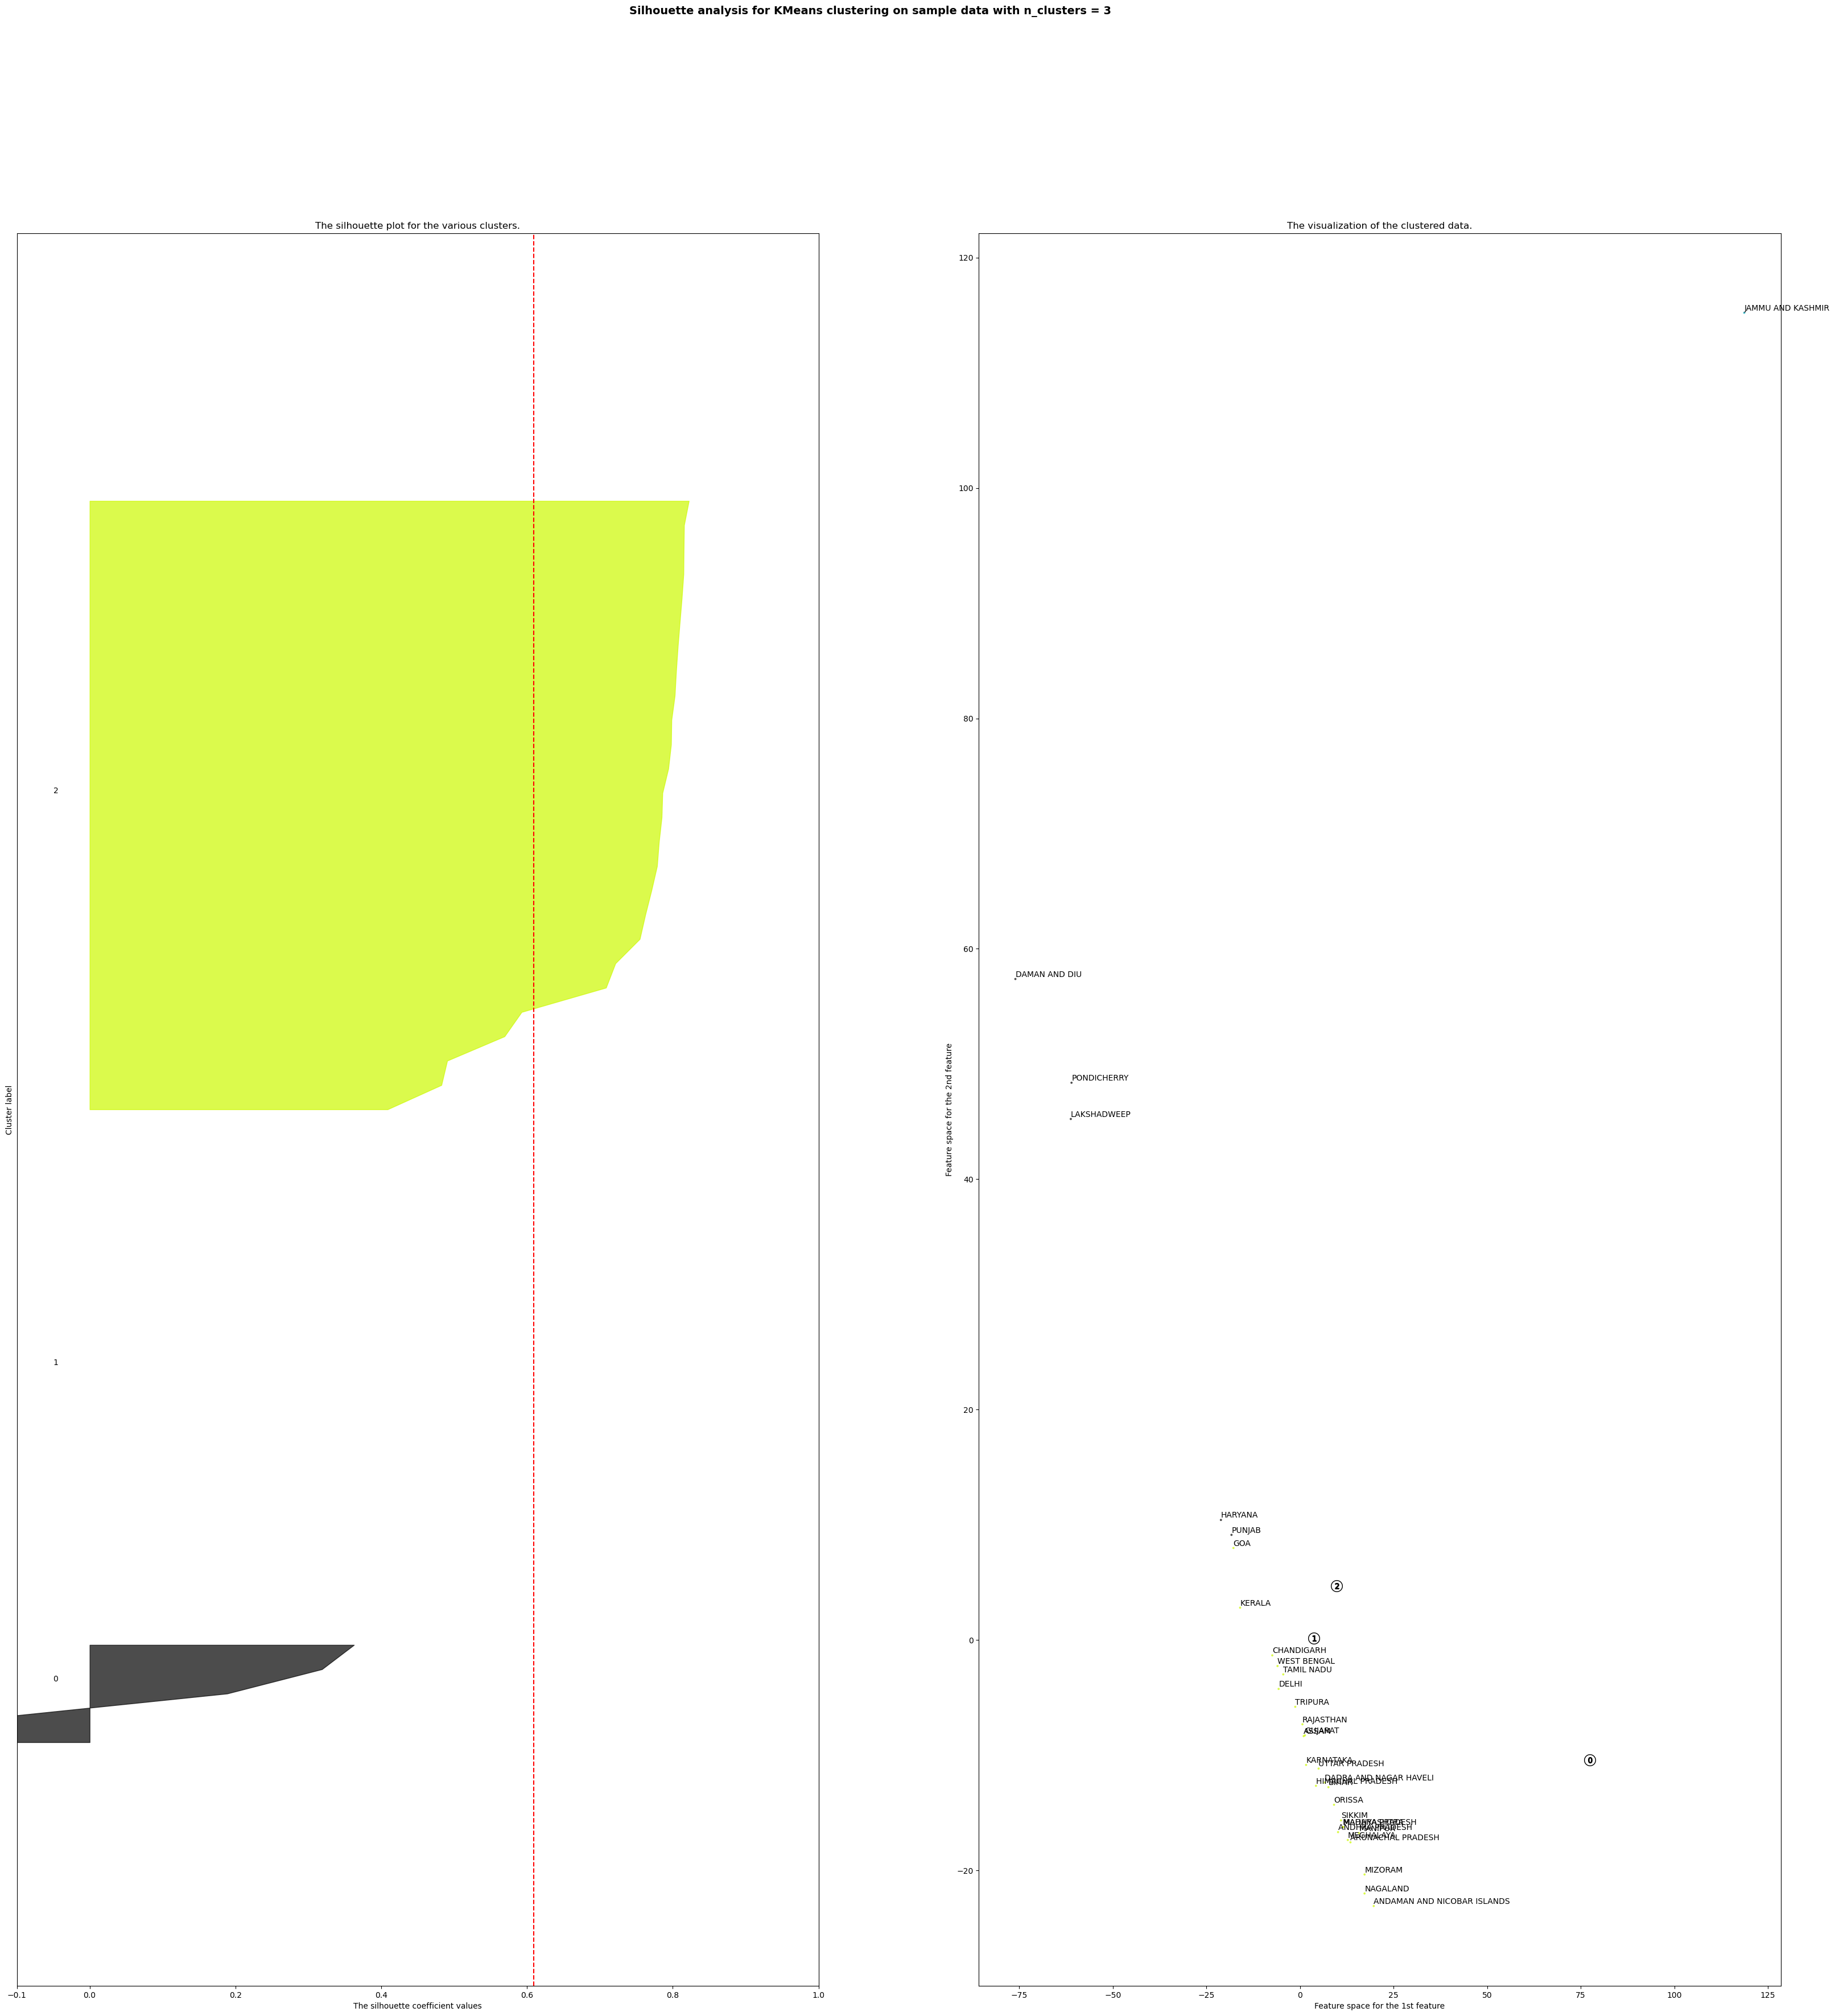

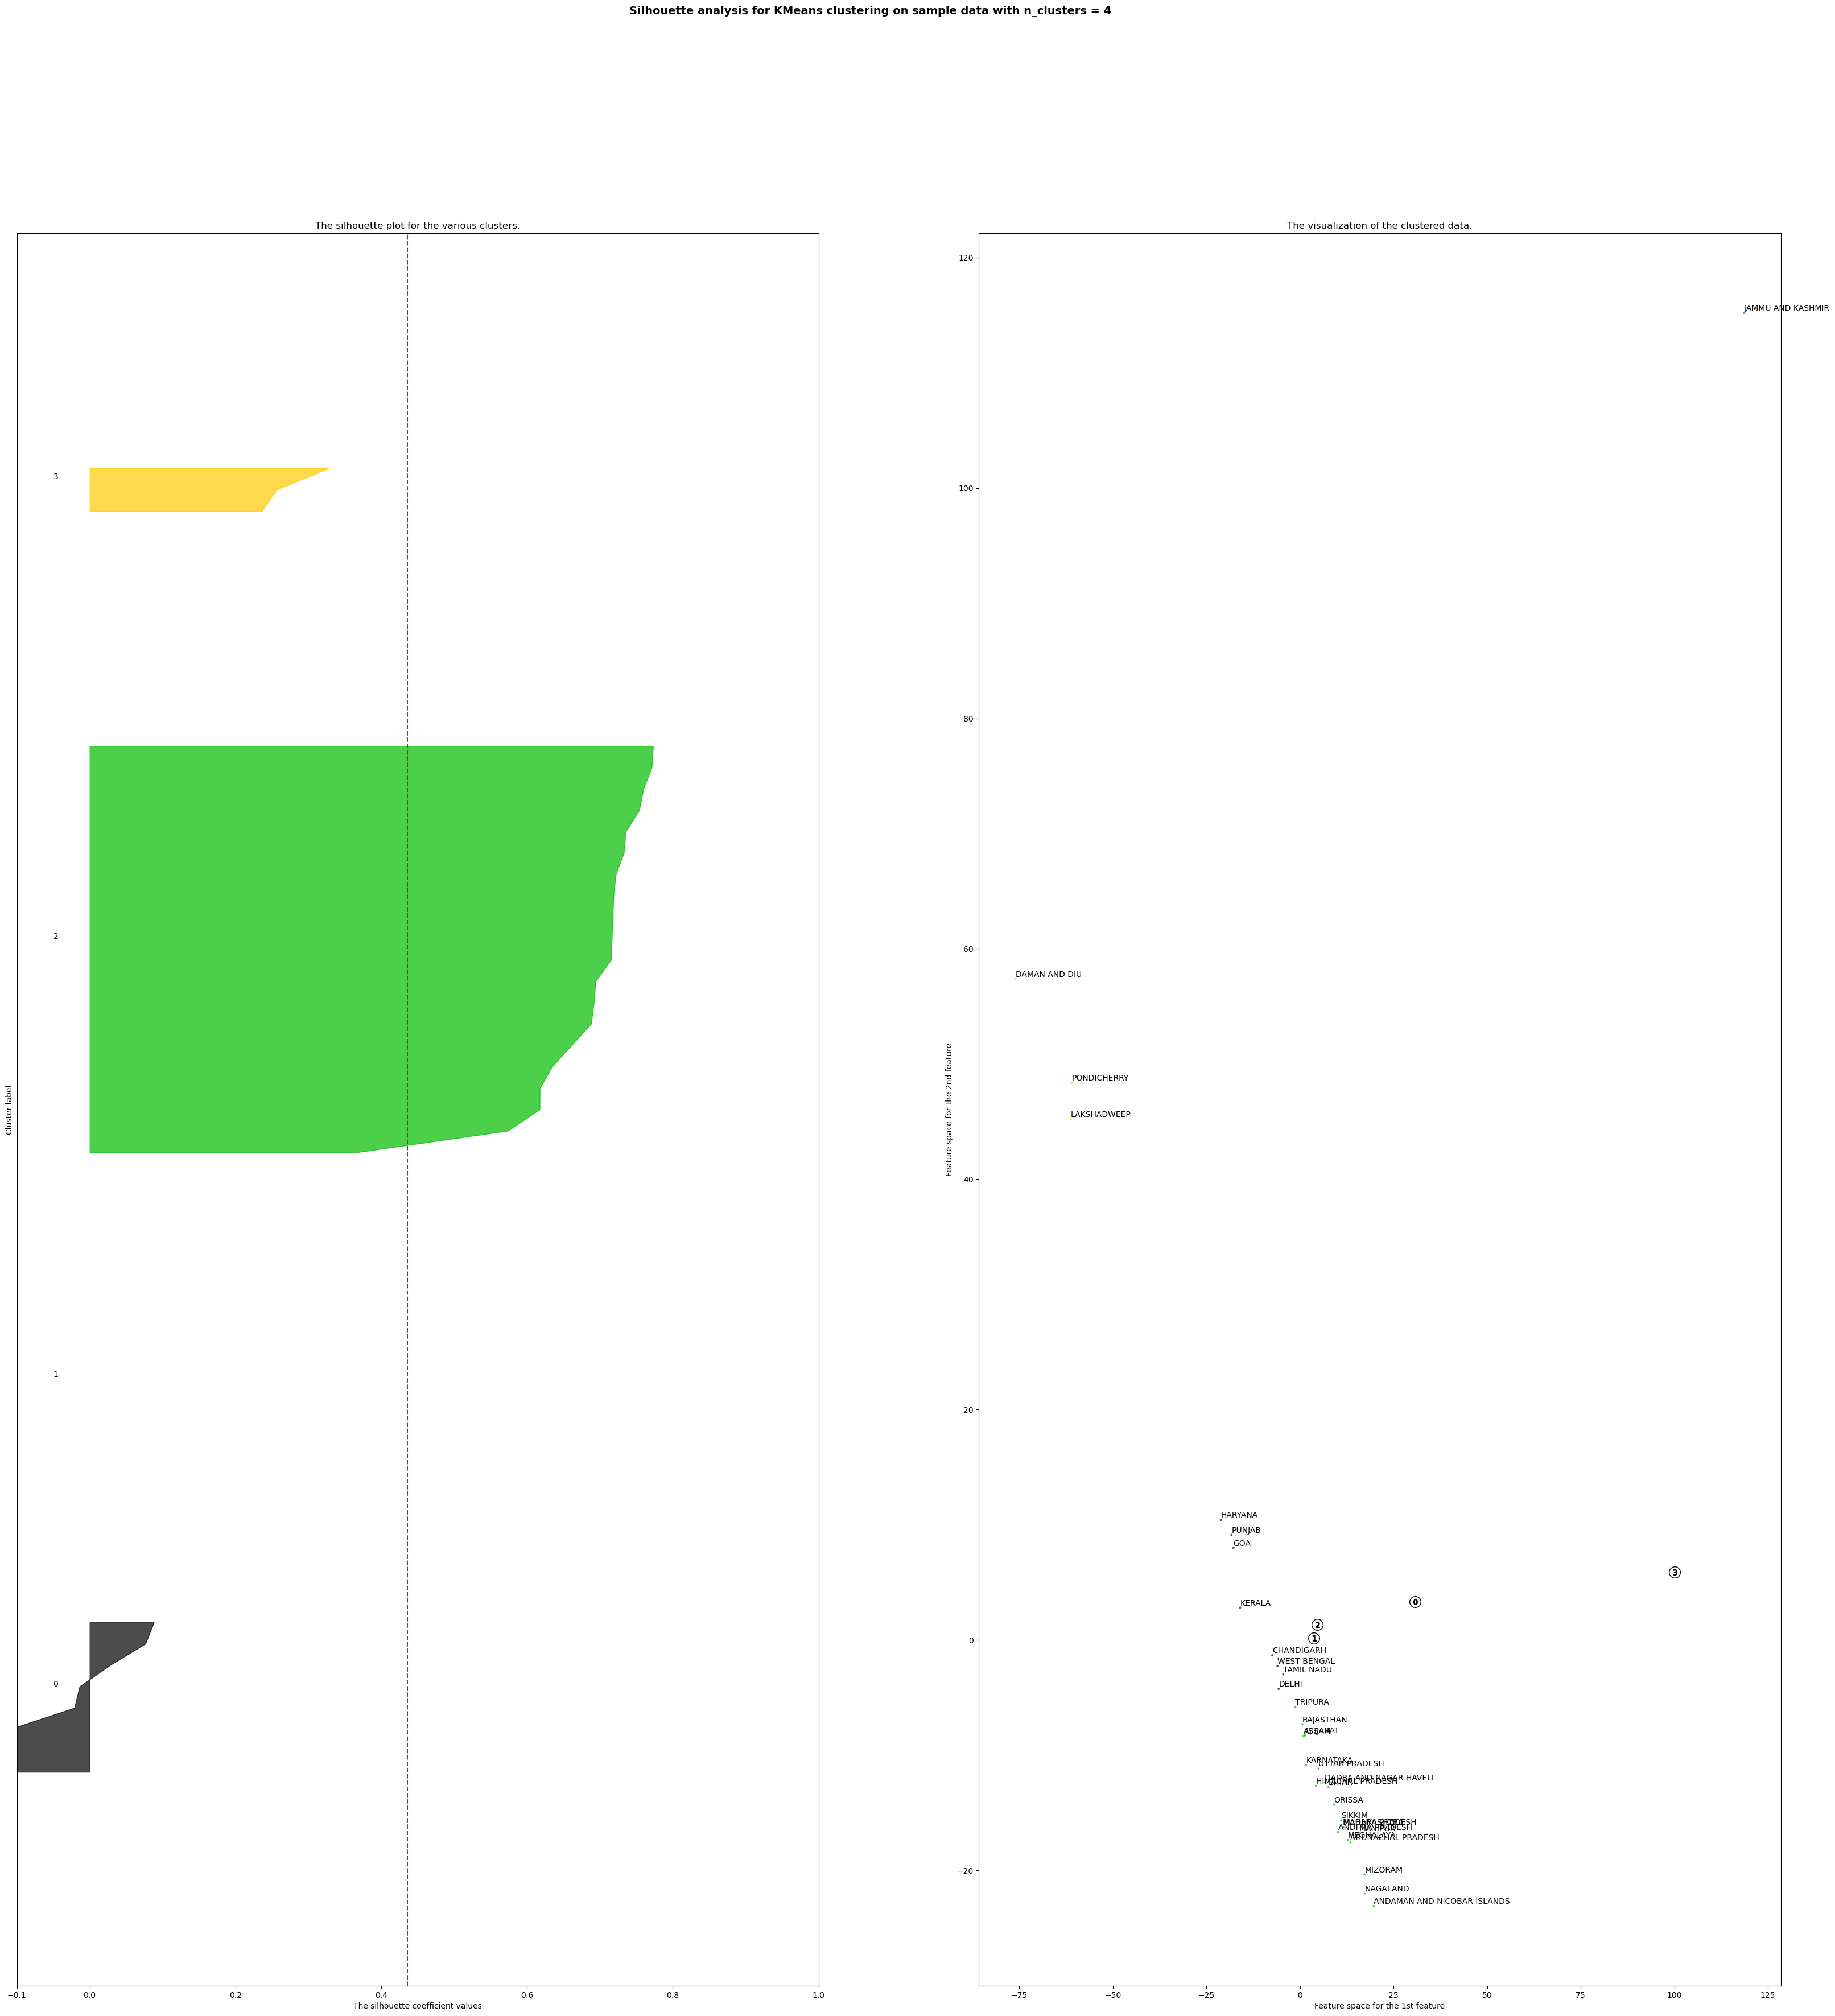

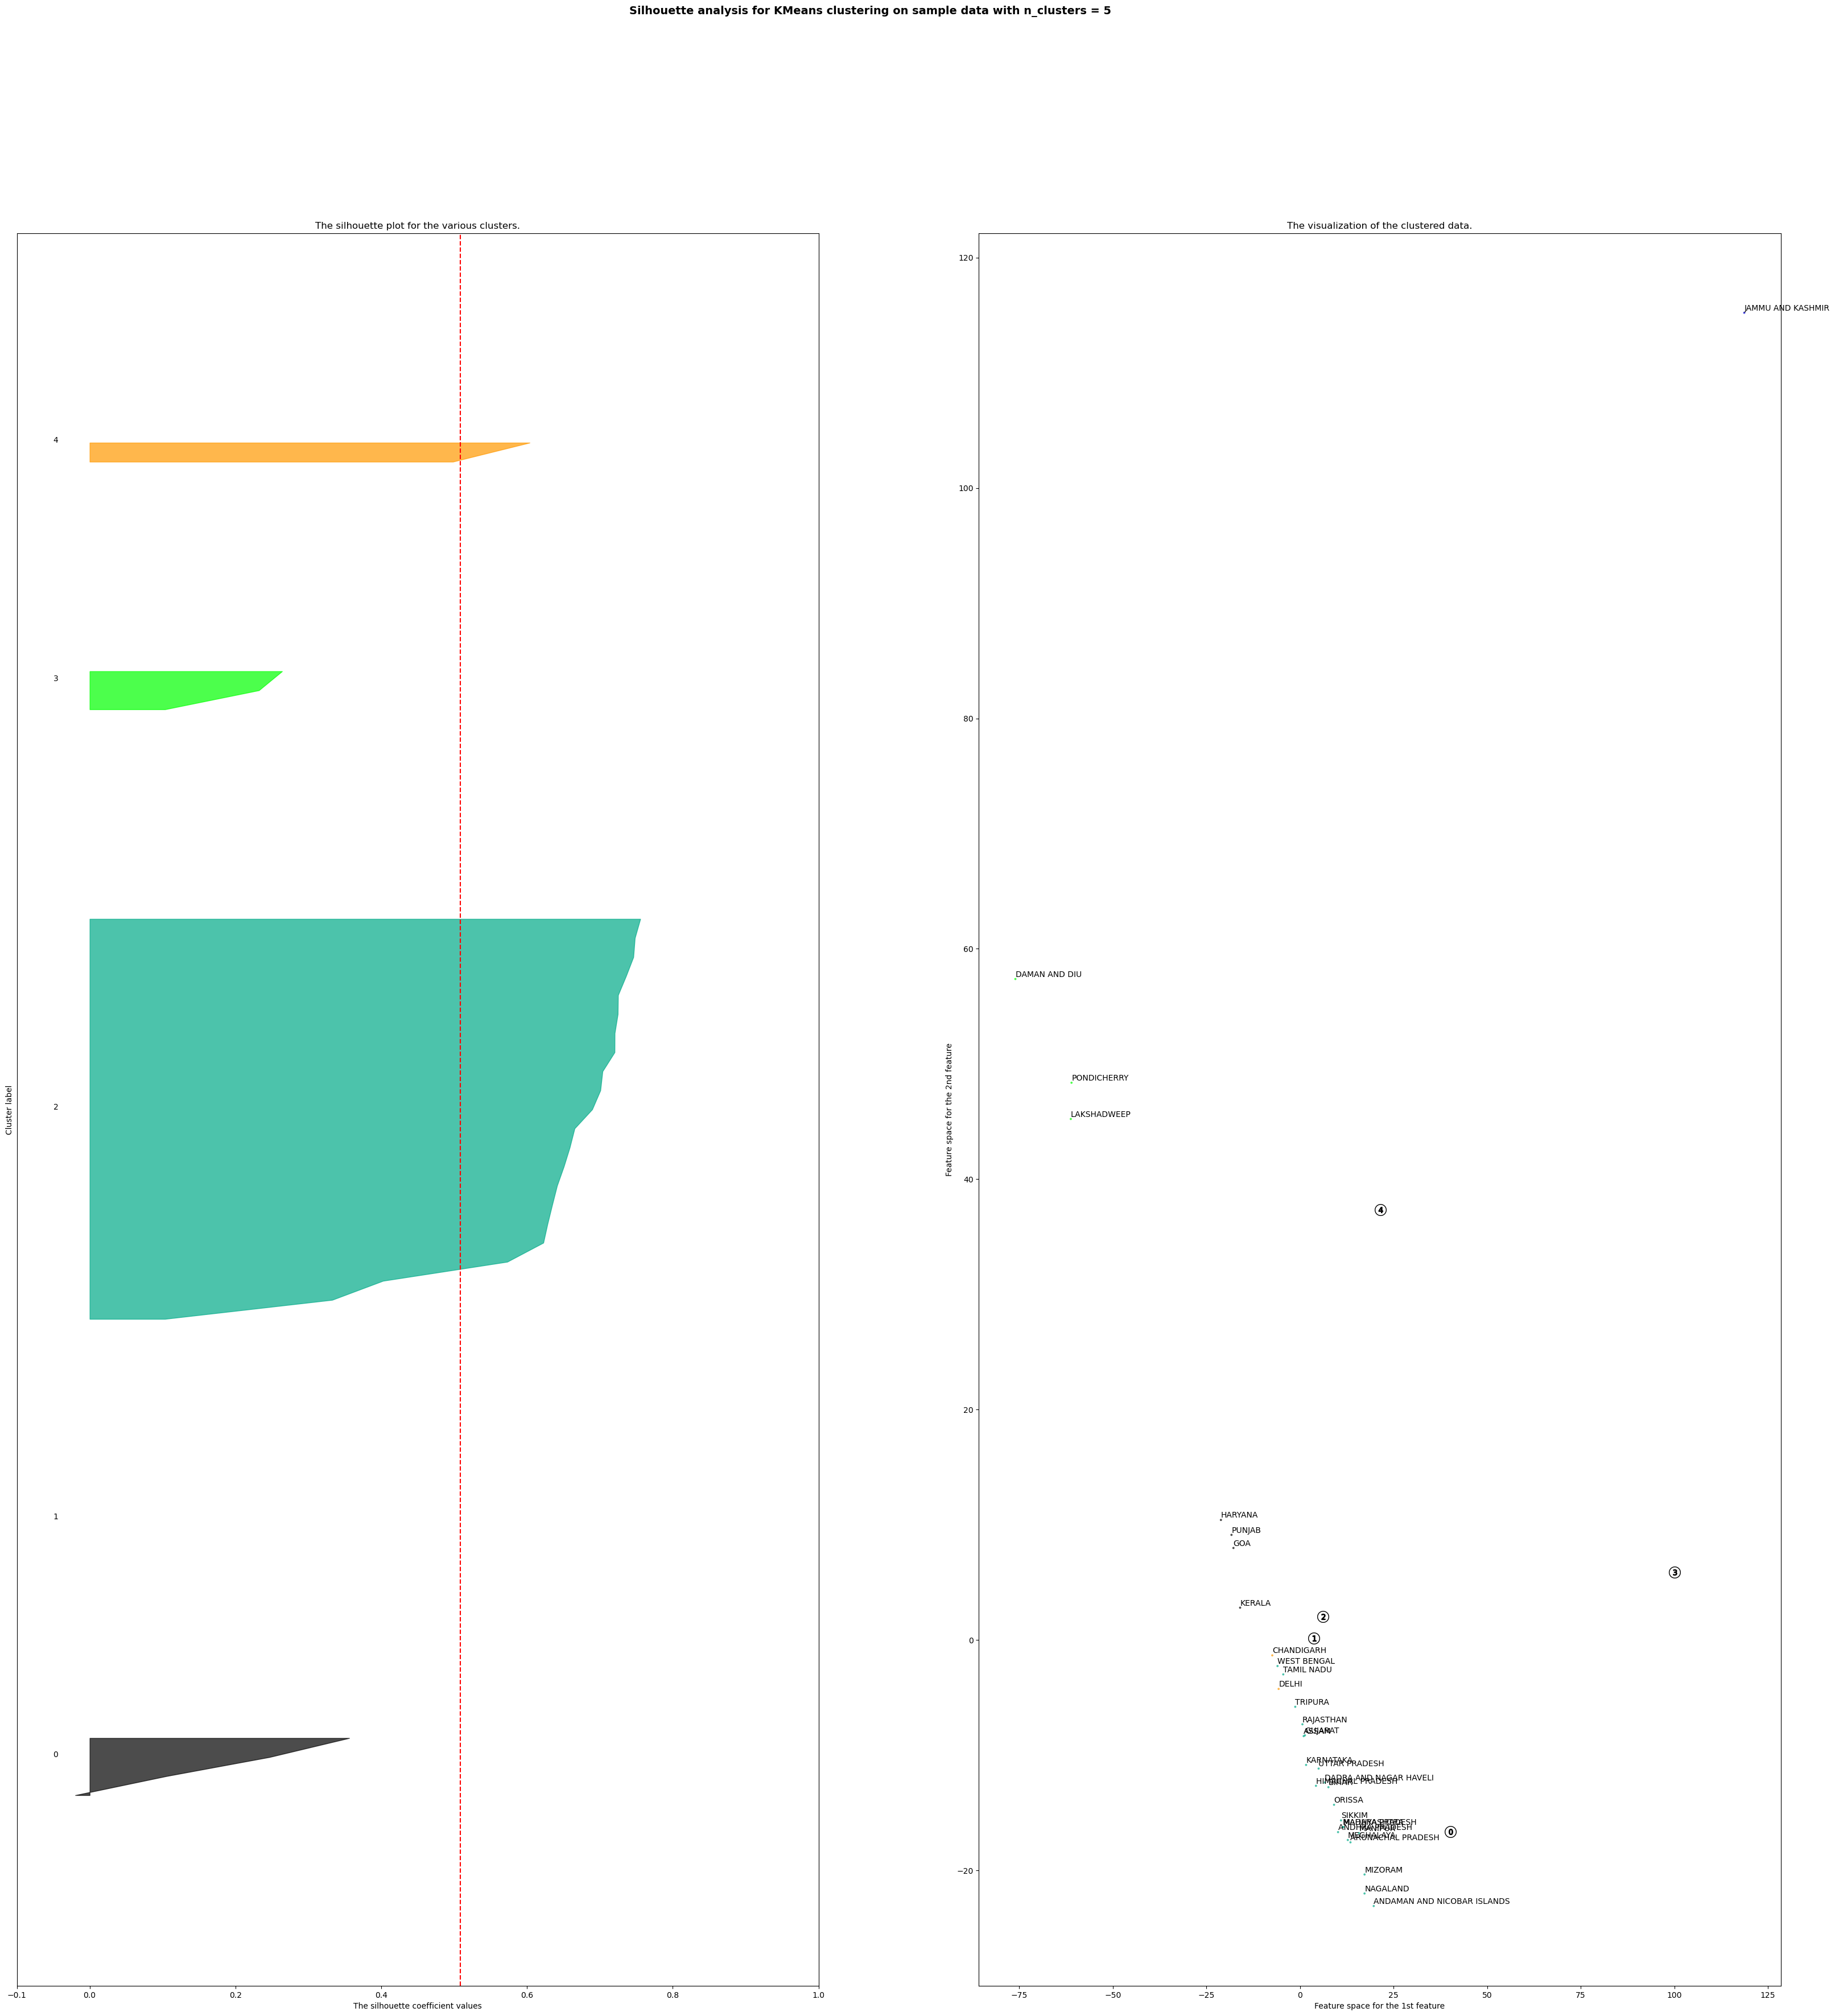

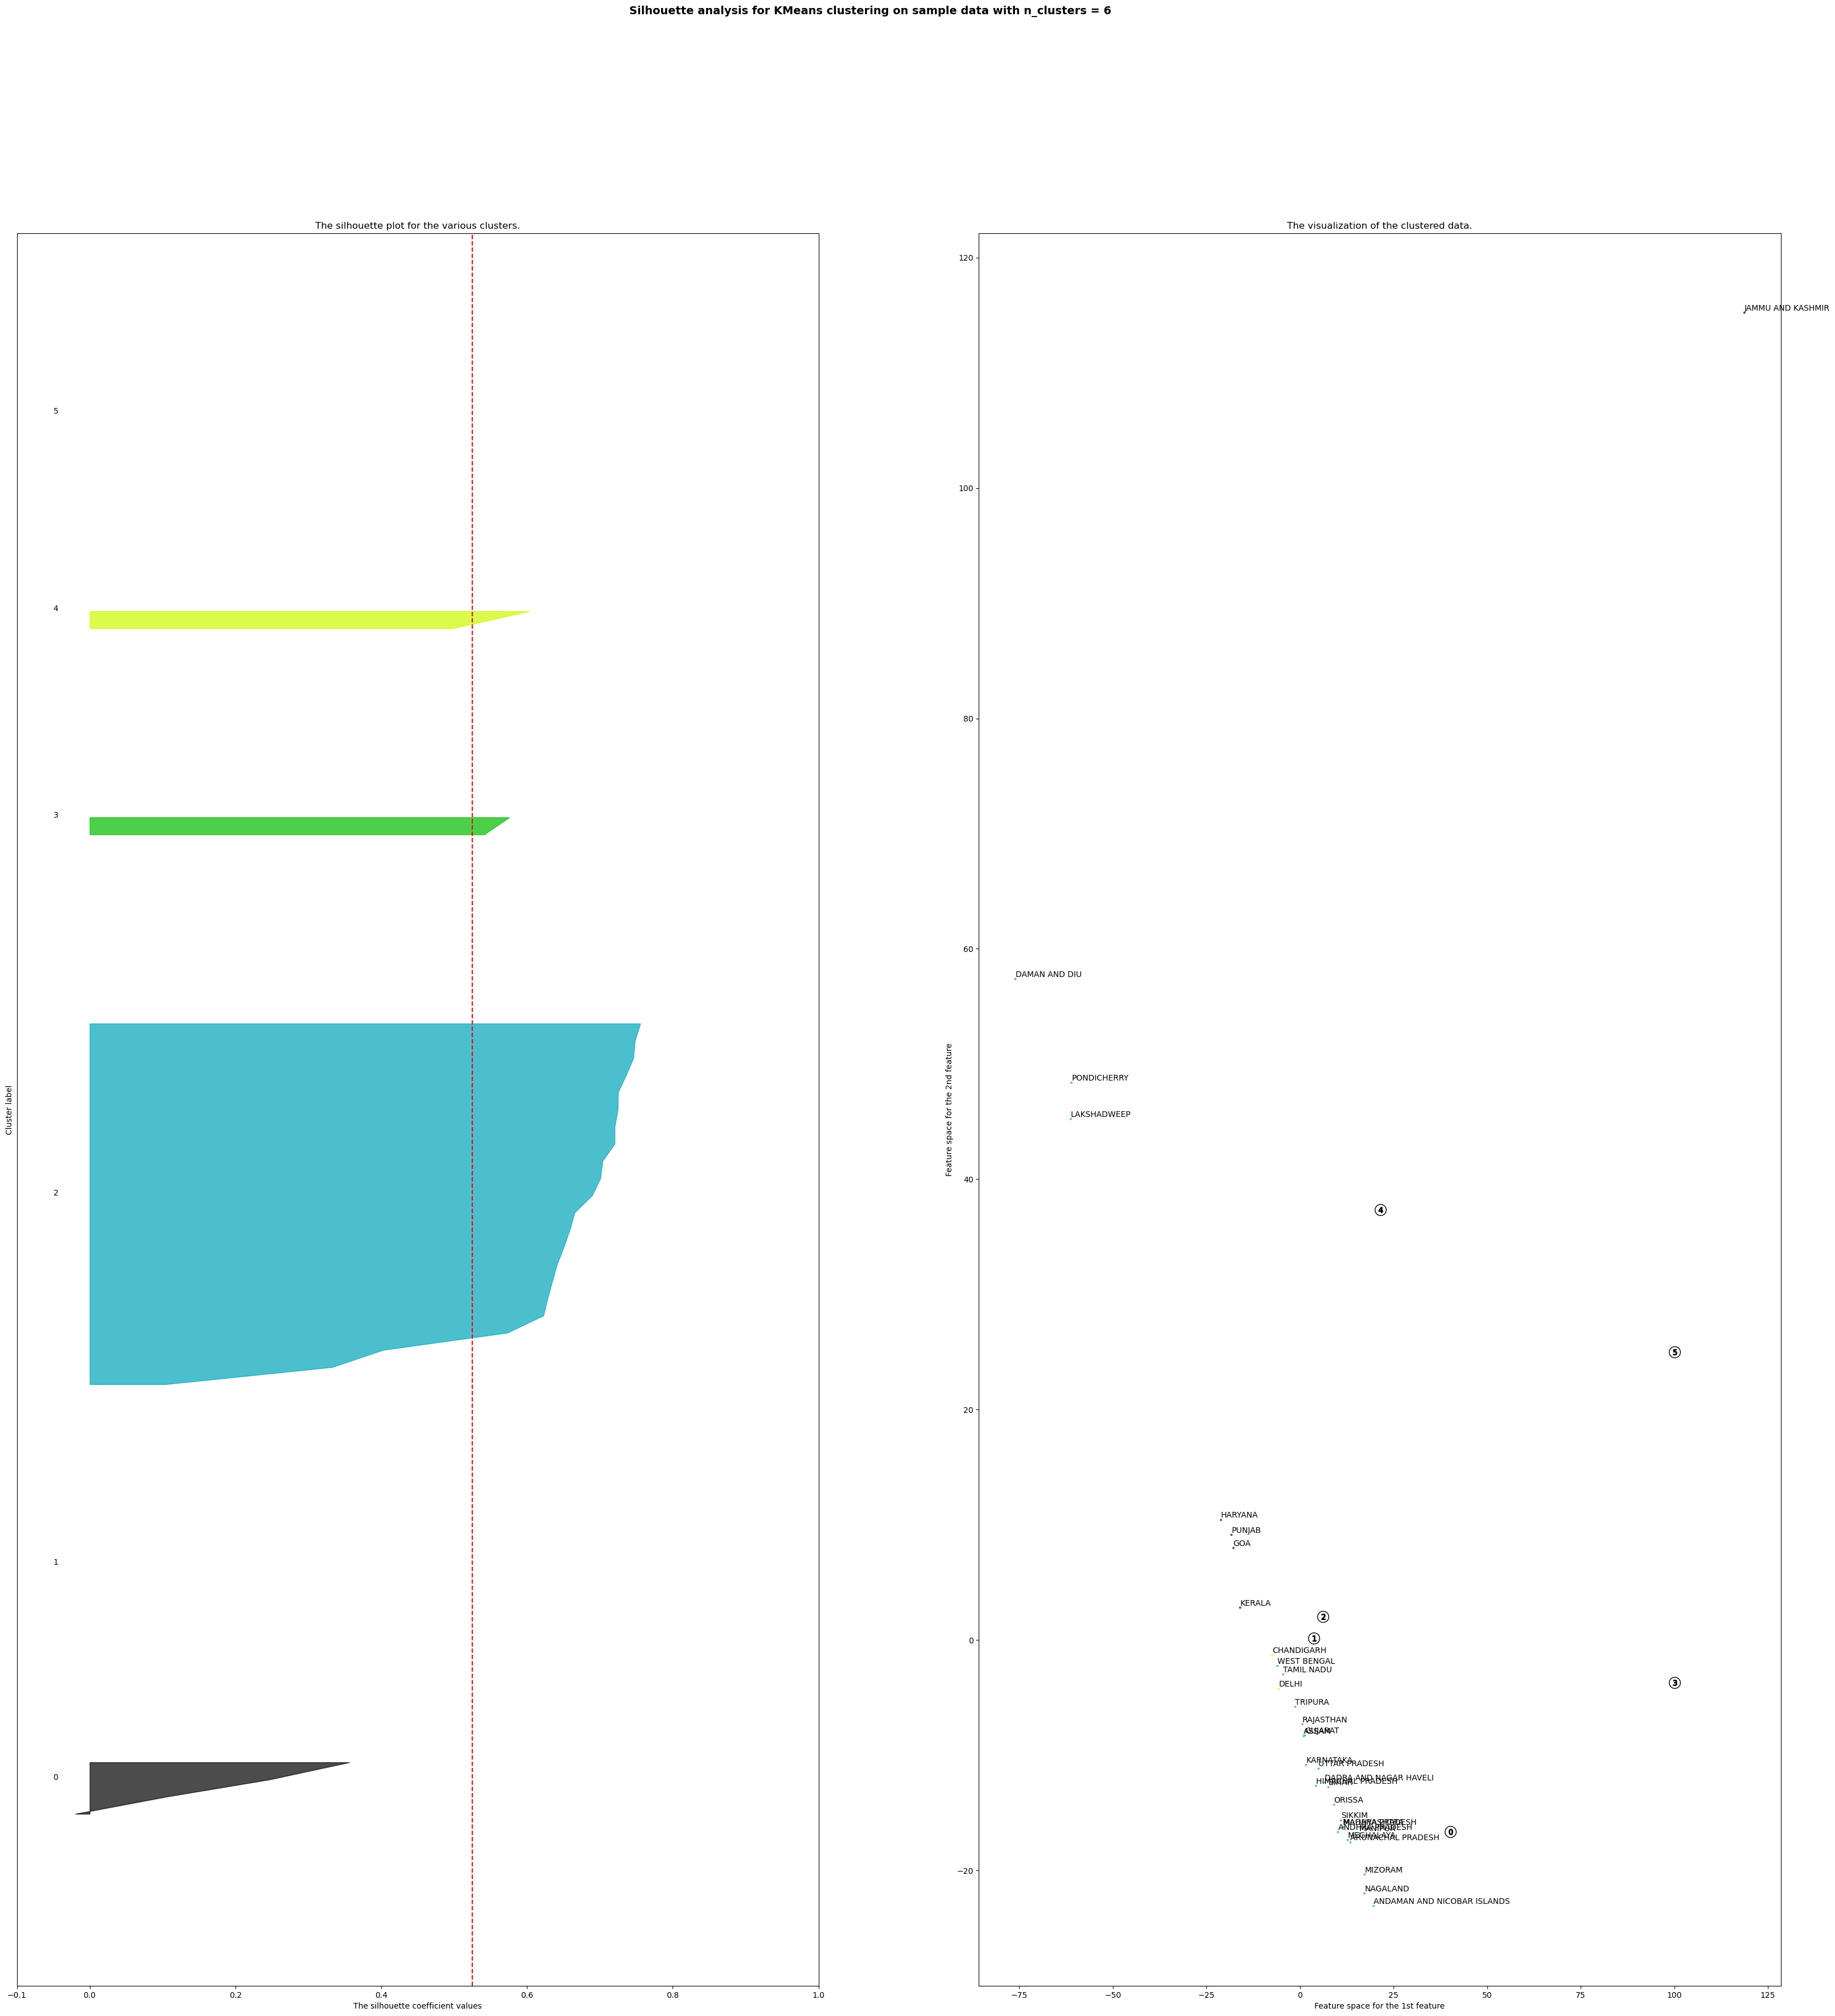

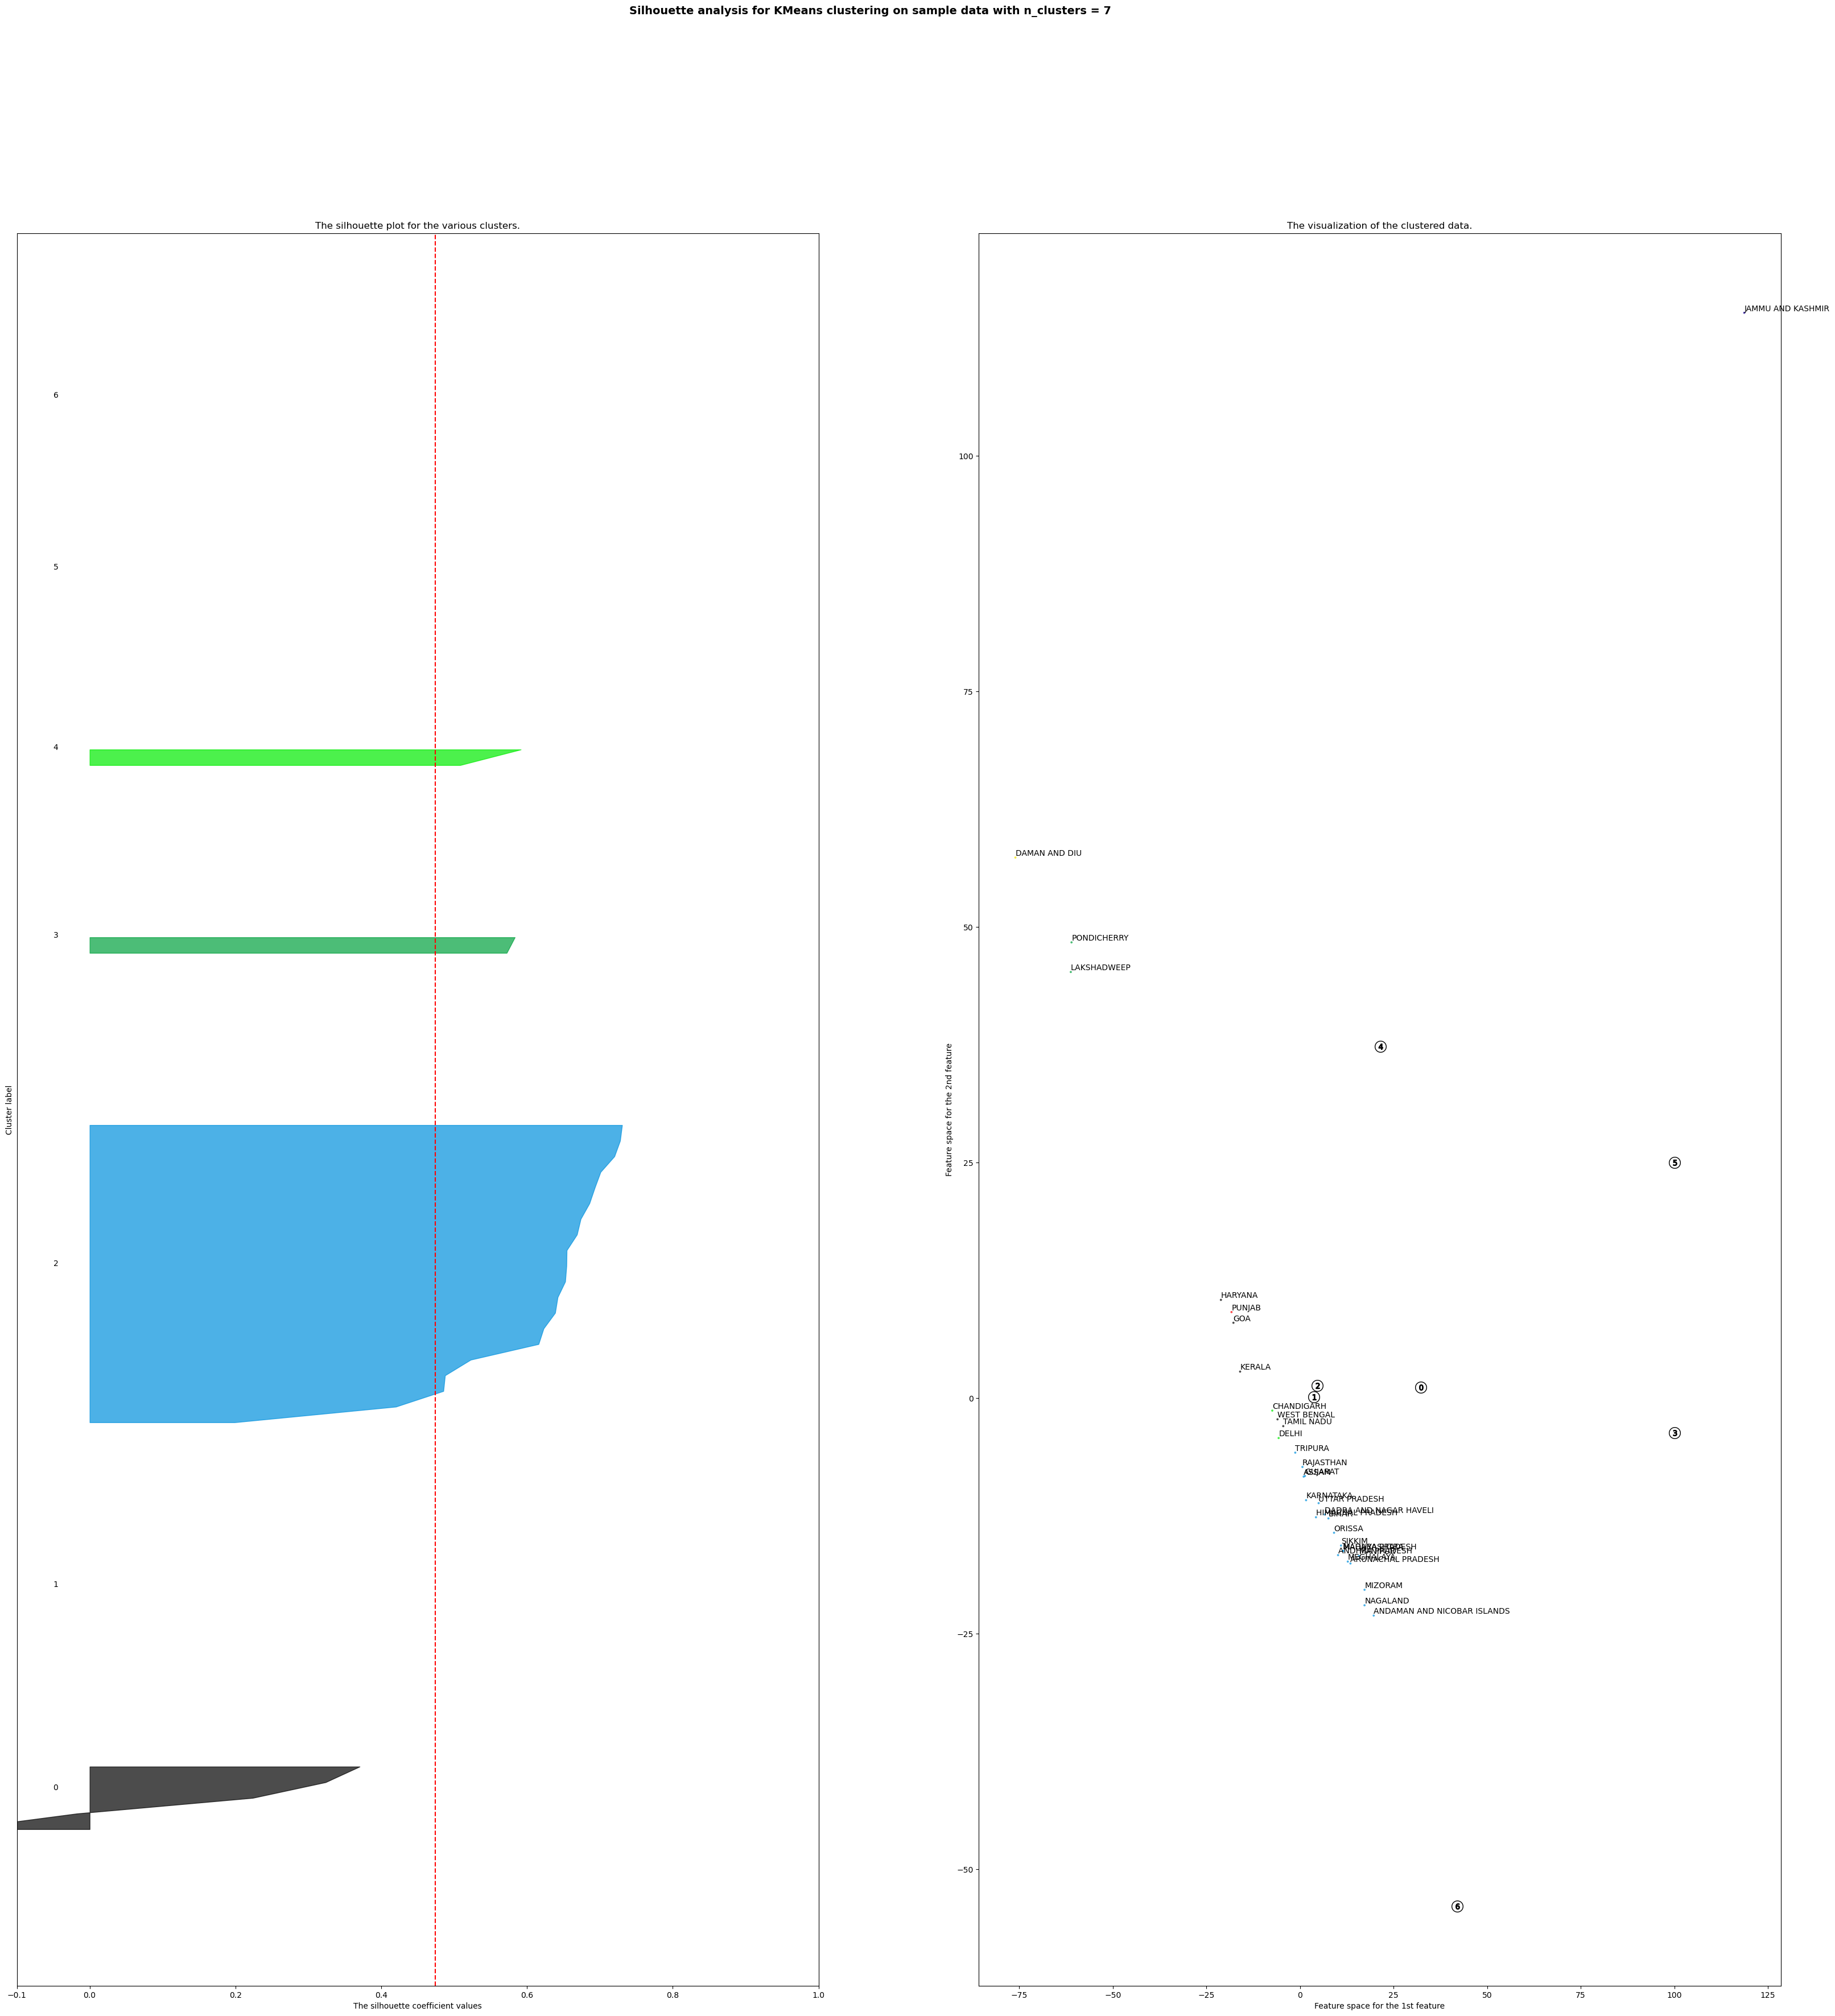

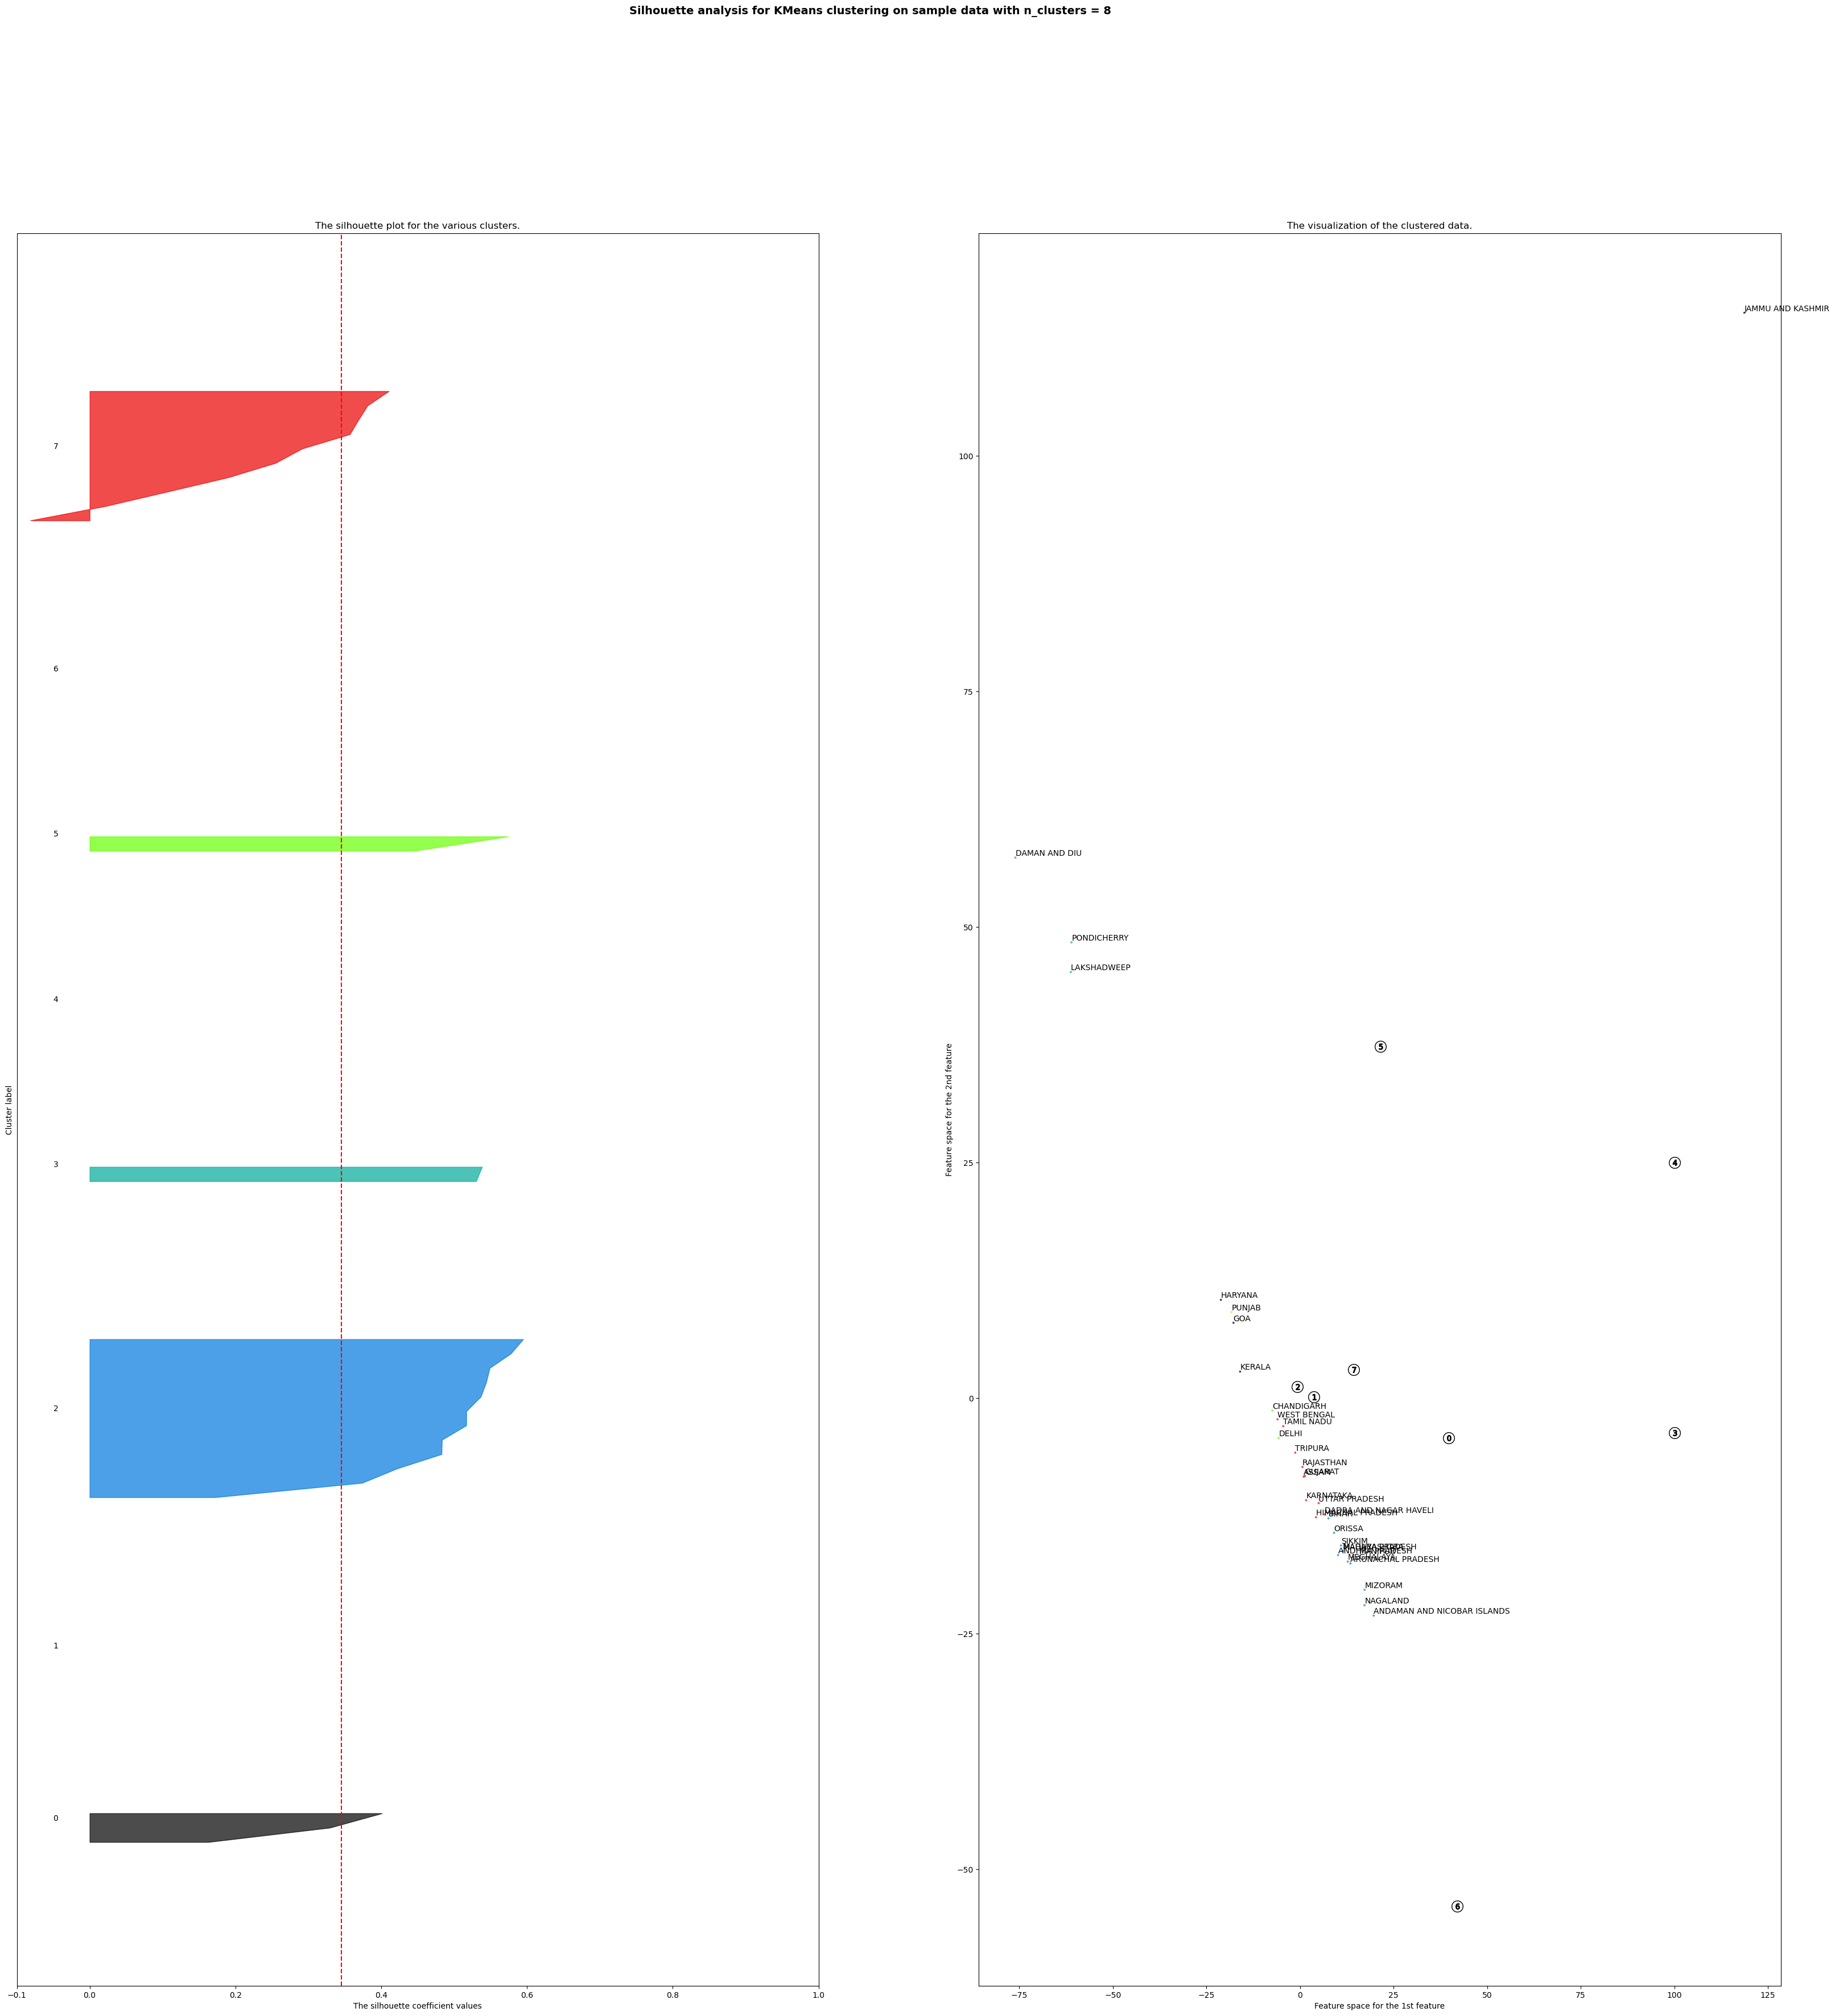

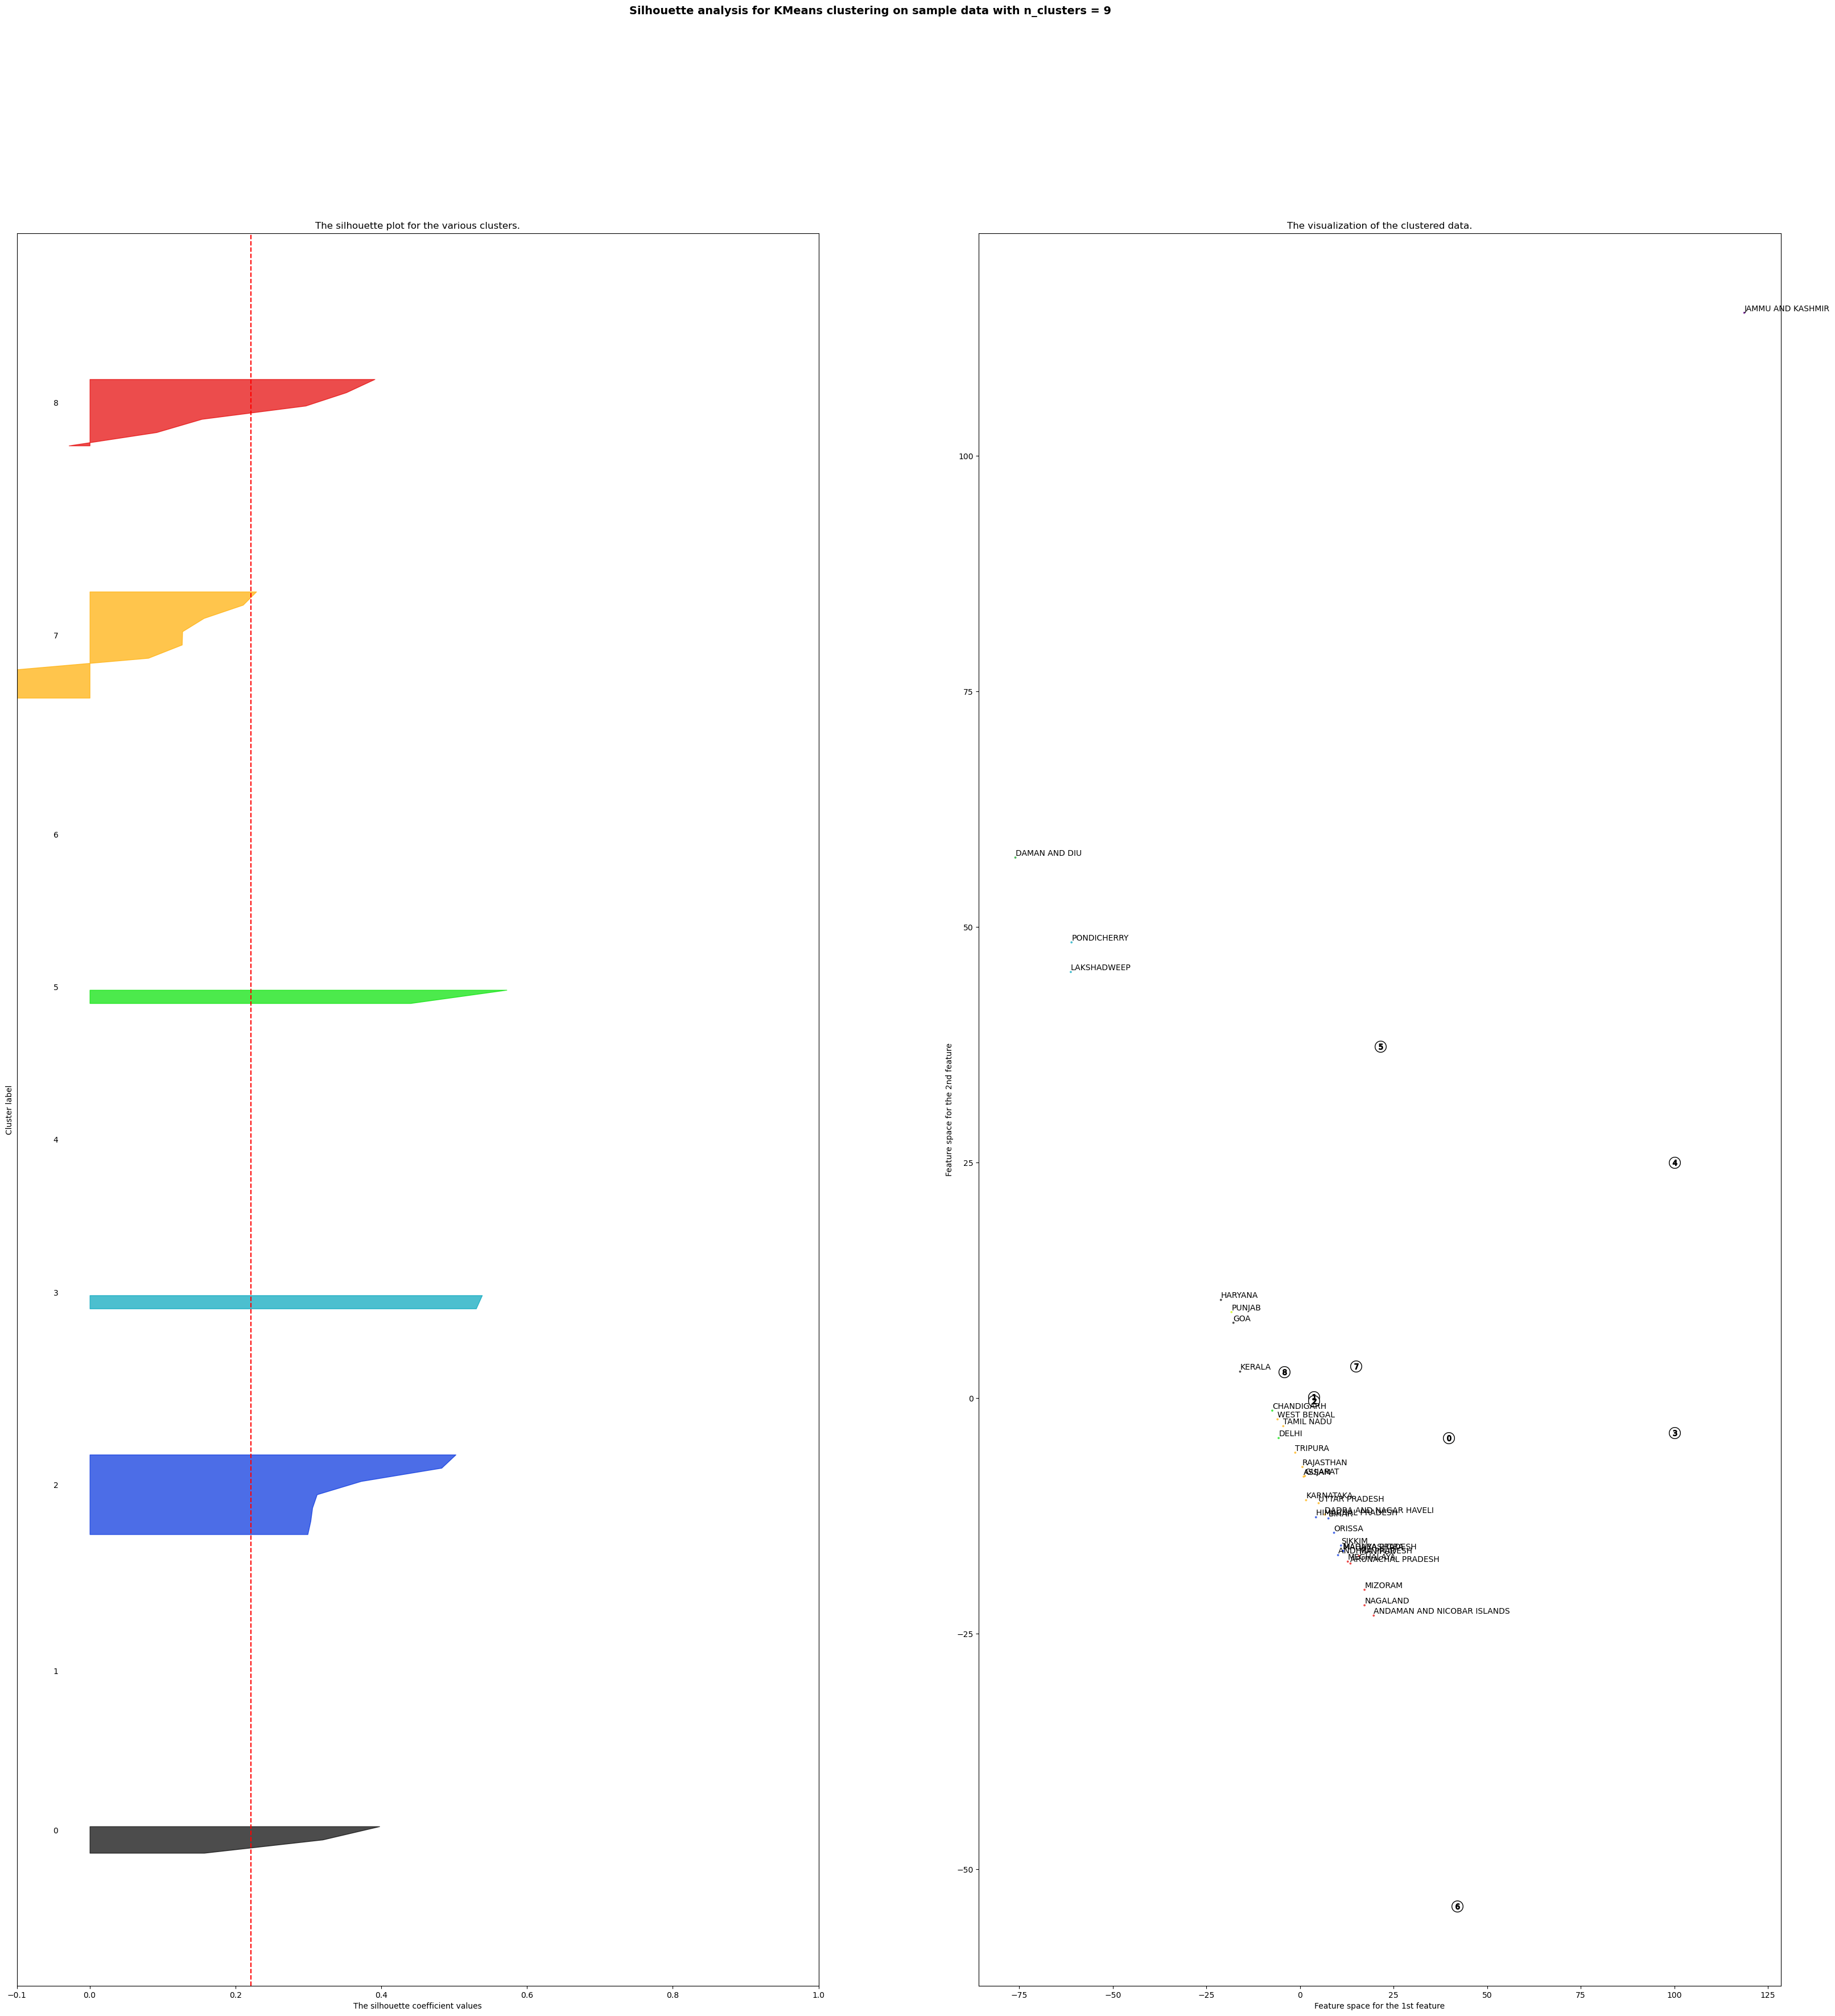

In [103]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(40, 40)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pct_yoy_del_cleaned) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df_pct_yoy_del_cleaned)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pct_yoy_del_cleaned, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    sample_silhouette_values = silhouette_samples(df_pct_yoy_del_cleaned, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(
        df_pct_yoy_del_cleaned_reduced.transpose().iloc[:, 0], 
        df_pct_yoy_del_cleaned_reduced.transpose().iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    for i in range(len(df_pct_yoy_del_cleaned_reduced.transpose().iloc[:, 0])):
                        ax2.annotate(list(df_pct_yoy_del_cleaned_reduced.transpose().index)[i], 
                                     (df_pct_yoy_del_cleaned_reduced.transpose().iloc[:, 0][i], 
                                      df_pct_yoy_del_cleaned_reduced.transpose().iloc[:, 1][i] + 0.2))
        
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [98]:
df_pct_yoy_del_cleaned_reduced.transpose()

,PC_1,PC_2
STATE,,
ANDAMAN AND NICOBAR ISLANDS,19.694932,-23.089022
ANDHRA PRADESH,10.171549,-16.673384
ARUNACHAL PRADESH,13.490172,-17.559752
ASSAM,0.989007,-8.340486
BIHAR,7.599084,-12.775100
CHANDIGARH,-7.394633,-1.329979
DADRA AND NAGAR HAVELI,6.647257,-12.366768
DAMAN AND DIU,-76.016600,57.377815
DELHI,-5.698915,-4.244355


In [85]:
df_pct_yoy_del_cleaned

STATE
ANDAMAN AND NICOBAR ISLANDS     -9.754690
ANDHRA PRADESH                   0.914040
ARUNACHAL PRADESH               -1.178632
ASSAM                           14.526954
BIHAR                            6.640336
CHANDIGARH                      22.222222
DADRA AND NAGAR HAVELI           7.762557
DAMAN AND DIU                  100.000000
DELHI                           20.720721
GOA                             40.286396
GUJARAT                         14.433738
HARYANA                         45.039909
HIMACHAL PRADESH                 8.899721
JAMMU AND KASHMIR                3.748175
KARNATAKA                       12.230002
KERALA                          33.656812
LAKSHADWEEP                    100.000000
MADHYA PRADESH                   1.408240
MAHARASHTRA                      1.705910
MANIPUR                         -2.705896
MEGHALAYA                       -0.314425
MIZORAM                         -4.824511
NAGALAND                        -6.137130
ORISSA                      

In [92]:
df_pct_yoy_del_cleaned.columns

Int64Index([2001, 2003, 2005, 2007, 2011, 2013, 2017, 2019, 2021], dtype='int64', name='year')

In [93]:
from sklearn import datasets, decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(df_pct_yoy_del_cleaned)
df_pct_yoy_del_cleaned_reduced = pd.DataFrame(pca.transform(df_pct_yoy_del_cleaned).transpose(), 
                                              index = ['PC_1','PC_2'],
                                              columns = df_pct_yoy_del_cleaned.transpose().columns)

In [94]:
df_pct_yoy_del_cleaned_reduced

STATE,ANDAMAN AND NICOBAR ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,DADRA AND NAGAR HAVELI,DAMAN AND DIU,DELHI,GOA,...,NAGALAND,ORISSA,PONDICHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,WEST BENGAL
PC_1,19.694932,10.171549,13.490172,0.989007,7.599084,-7.394633,6.647257,-76.016600,-5.698915,-17.774089,...,17.242658,9.098506,-61.021999,-18.291069,0.655763,10.962944,-4.464446,-1.260733,4.984915,-5.995703
PC_2,-23.089022,-16.673384,-17.559752,-8.340486,-12.775100,-1.329979,-12.366768,57.377815,-4.244355,7.990895,...,-21.999173,-14.300970,48.374315,9.127572,-7.314512,-15.655359,-2.982469,-5.795727,-11.157290,-2.256716


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5662344175321901
For n_clusters = 6 The average silhouette_score is : 0.4358297989156284


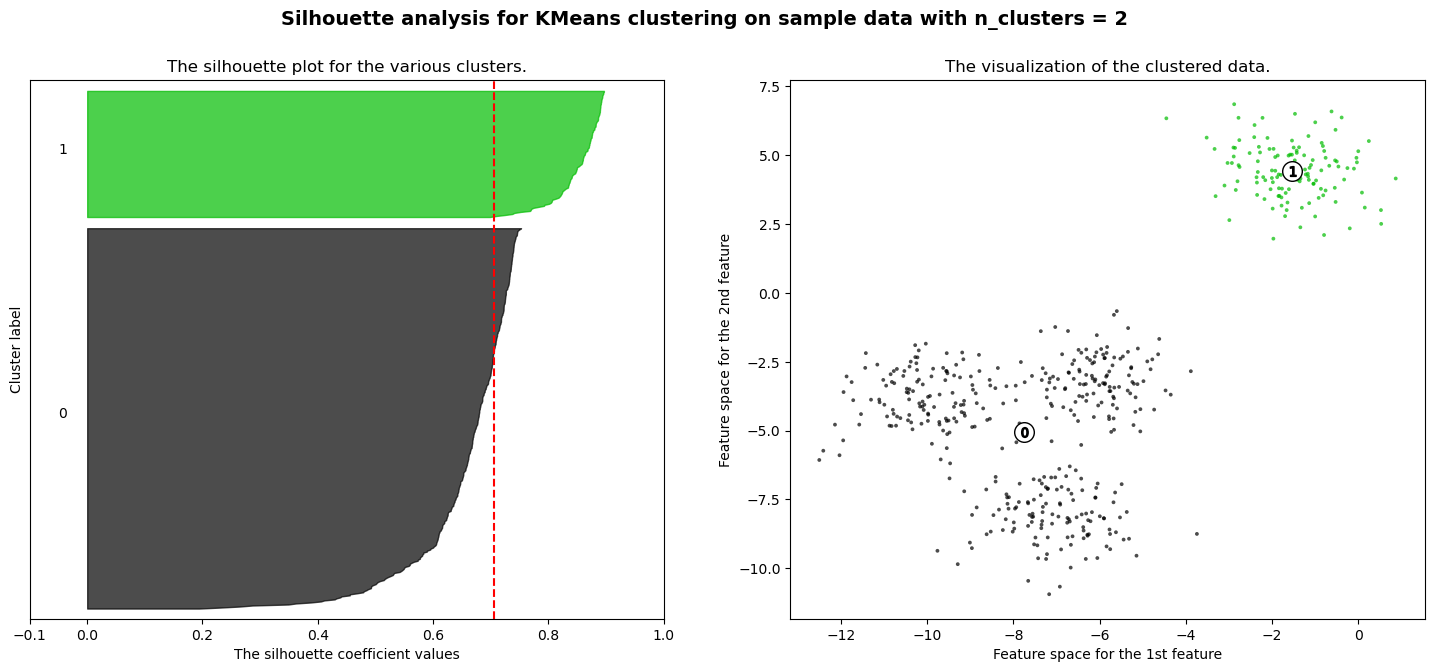

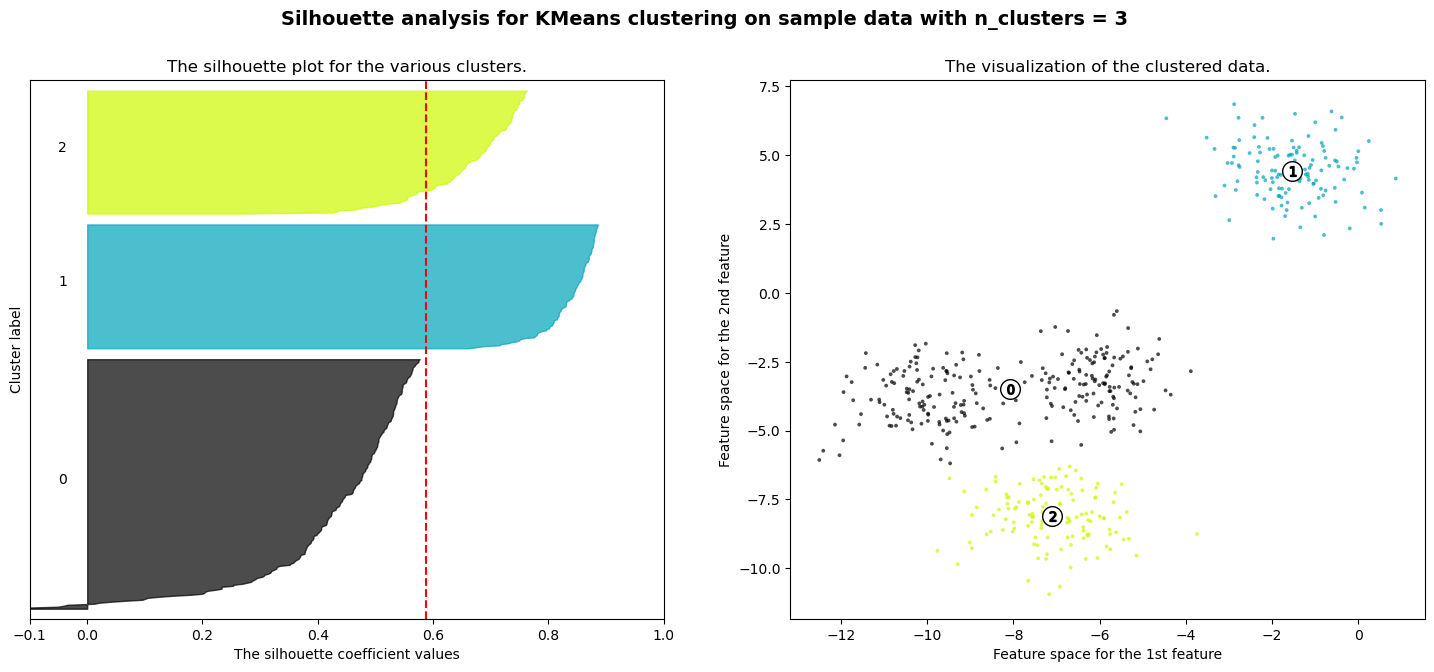

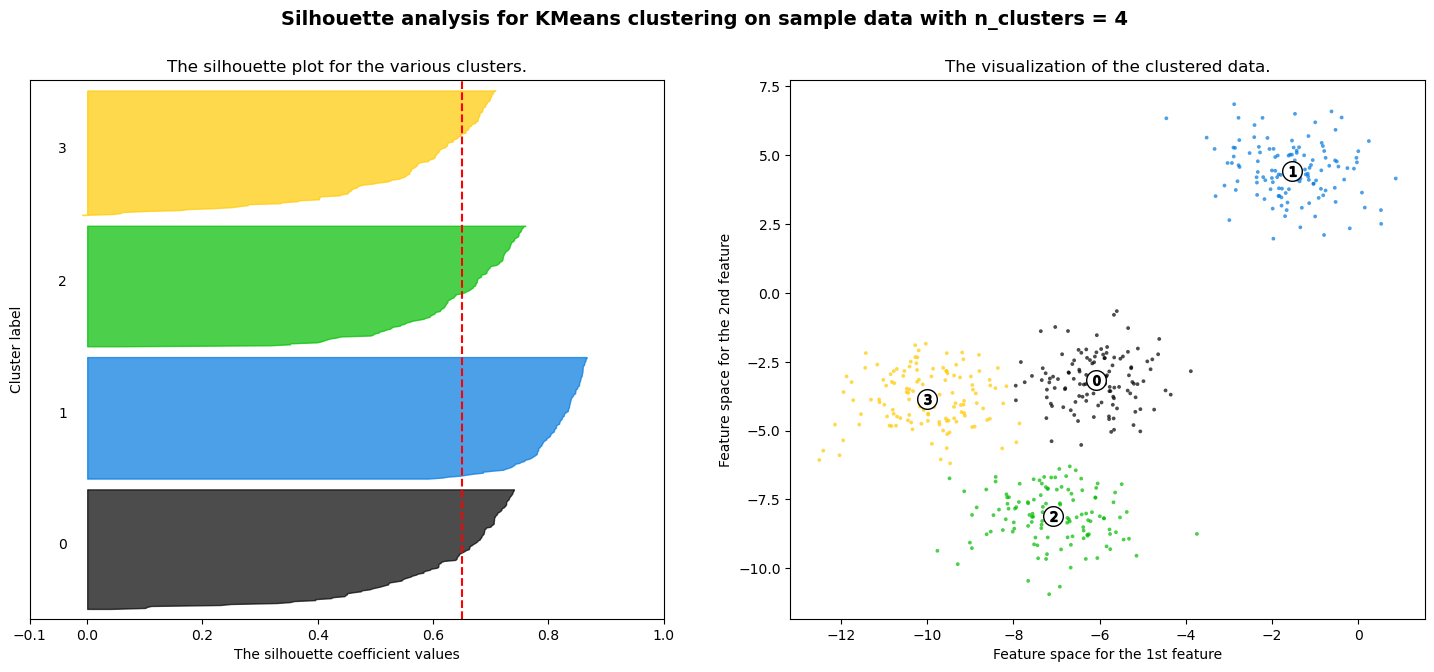

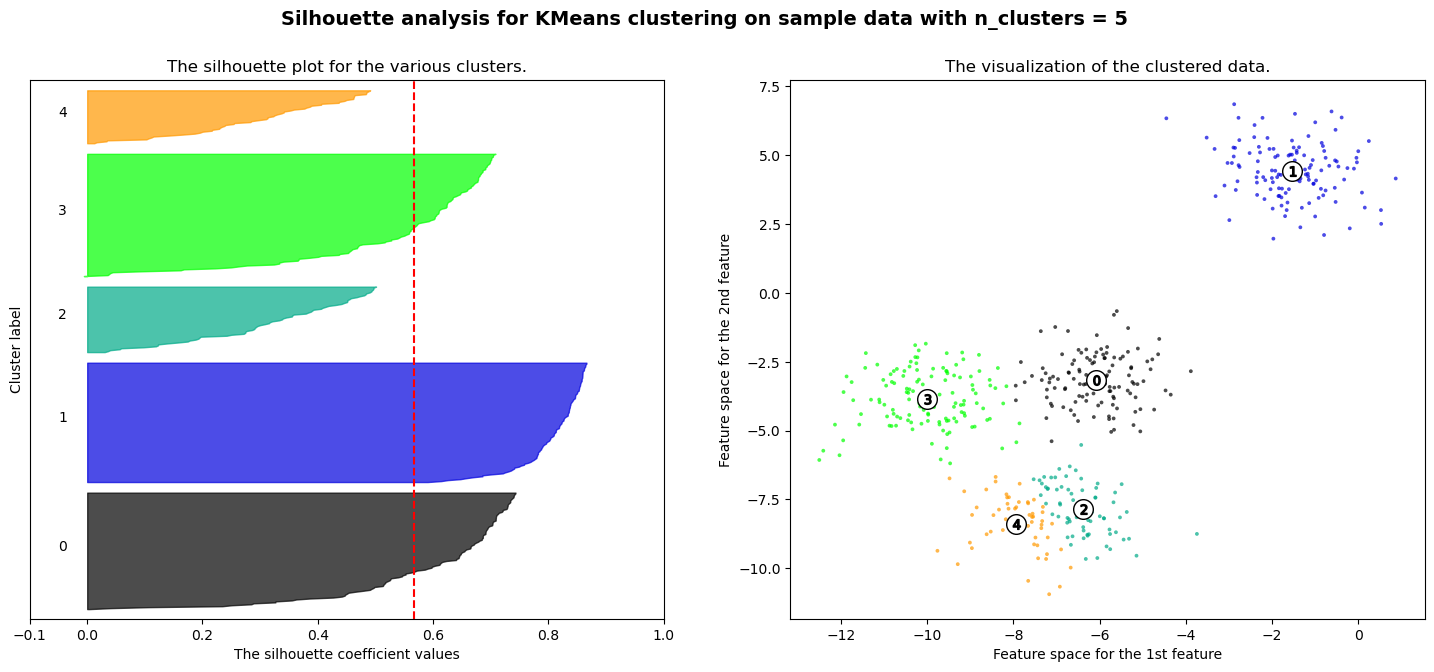

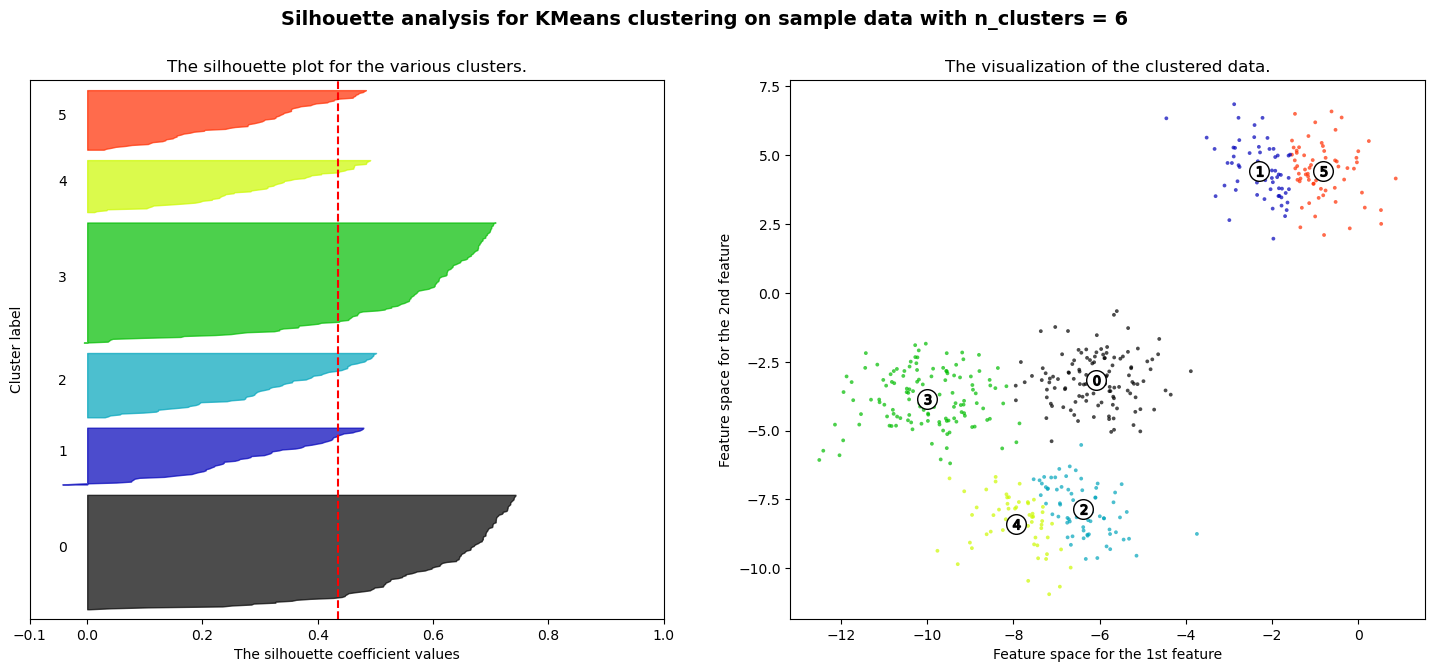

In [67]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()